In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
import pandas as pd
dataset1_path = "/content/drive/MyDrive/datasetcampusxbook/Books.csv"
book_data = pd.read_csv(dataset1_path)
dataset2_path = "/content/drive/MyDrive/datasetcampusxbook/Users.csv"
users_data = pd.read_csv(dataset2_path)
dataset2_path = "/content/drive/MyDrive/datasetcampusxbook/Ratings.csv"
ratings_data = pd.read_csv(dataset2_path)


<ipython-input-3-71cf0b68b606>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_data = pd.read_csv(dataset1_path)


In [ ]:
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [ ]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64


In [ ]:

# nan values in particular column
book_data.loc[(book_data['book_author'].isnull()),: ]

isbn                                         book_title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       book_author year_of_publication                       publisher  
118033         NaN                1999              Dorling Kindersley  
187689         NaN                1995  Edinburgh Financial Publishing

In [ ]:
# nan values in particular column
book_data.loc[(book_data['publisher'].isnull()),: ]

isbn       book_title      book_author year_of_publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae                2002   
129037  1931696993  Finders Keepers  Linnea Sinclair                2001   

       publisher  
128890       NaN  
129037       NaN

In [ ]:
book_data[book_data['year_of_publication'] == 'DK Publishing Inc']

isbn                                         book_title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       book_author year_of_publication  \
209538        2000   DK Publishing Inc   
221678        2000   DK Publishing Inc   

                                                publisher  
209538  http://images.amazon.com/images/P/078946697X.0...  
221678  http://images.amazon.com/images/P/0789466953.0...

In [ ]:
book_data[book_data['year_of_publication'] == 'Gallimard']

isbn                                         book_title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   

       book_author year_of_publication  \
220731        2003           Gallimard   

                                                publisher  
220731  http://images.amazon.com/images/P/2070426769.0...

In [ ]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [ ]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

isbn                                         book_title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 book_author year_of_publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               publisher  
0                                Oxford University Press  
1                                  HarperFlamingo Canada  
2                                        HarperPerennial  
3                                   Farrar Straus Giroux  
4                             W. W. Norton &amp; Company  
...                                                  ...  
271355                   Random House Childrens Pub (Mm)  
271356                                      Dutton Books  
271357                                HarperSanFrancisco  
271358                           Oxford University Press  
271359  McGraw-Hill Humanities/Social Sciences/Languages  

[271360 rows x 5 columns]

In [ ]:
book_data.loc[(book_data['publisher'].isnull()),: ]

isbn       book_title      book_author year_of_publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae                2002   
129037  1931696993  Finders Keepers  Linnea Sinclair                2001   

       publisher  
128890       NaN  
129037       NaN

In [ ]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [ ]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

publisher
0     Oxford University Press
1       HarperFlamingo Canada
2             HarperPerennial
3        Farrar Straus Giroux
4  W. W. Norton &amp; Company

In [ ]:
book_data[book_data['publisher'] == 'No Mention']

isbn       book_title      book_author year_of_publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae                2002   
129037  1931696993  Finders Keepers  Linnea Sinclair                2001   

         publisher  
128890  No Mention  
129037  No Mention

In [ ]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [ ]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

In [ ]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

user_id        isbn  book_rating
0         276725  034545104X            0
1         276726  0155061224            5
2         276727  0446520802            0
3         276729  052165615X            3
4         276729  0521795028            6
...          ...         ...          ...
1149774   276704  0876044011            0
1149775   276704  1563526298            9
1149776   276706  0679447156            0
1149777   276709  0515107662           10
1149778   276721  0590442449           10

[1031136 rows x 3 columns]

In [ ]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [ ]:

unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

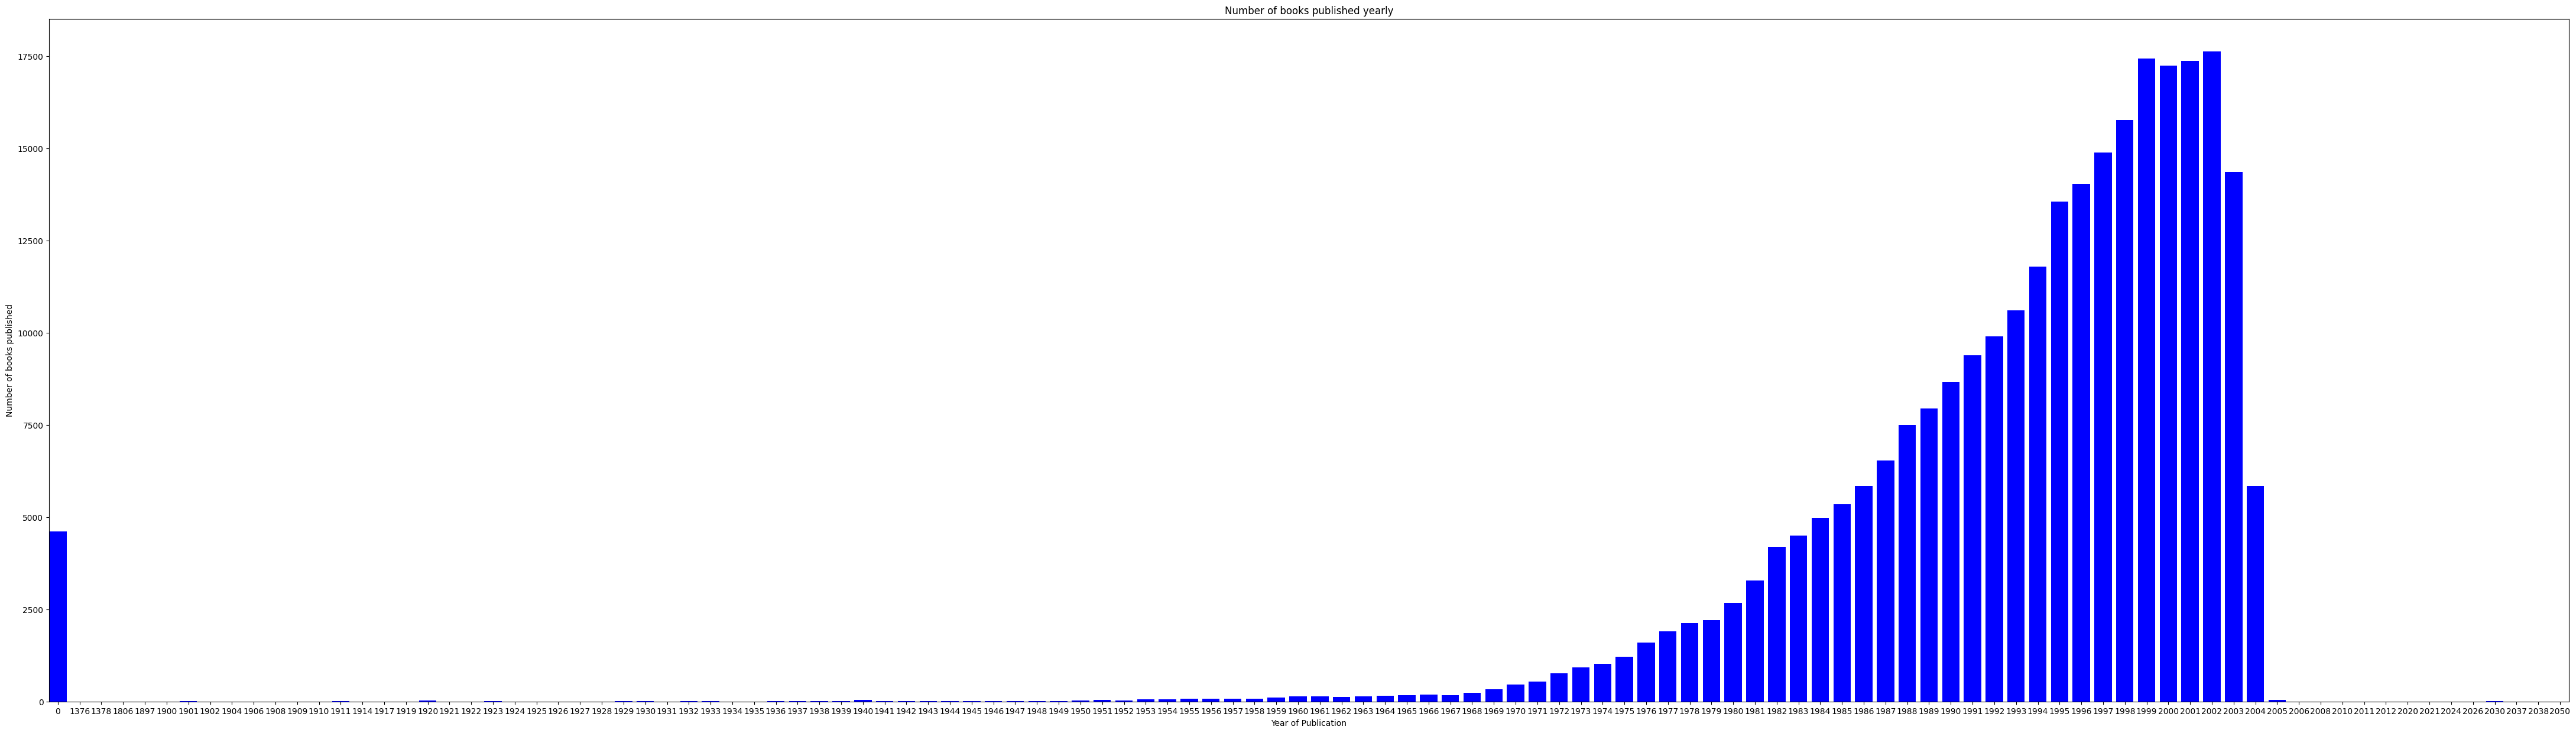

In [ ]:
publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [ ]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


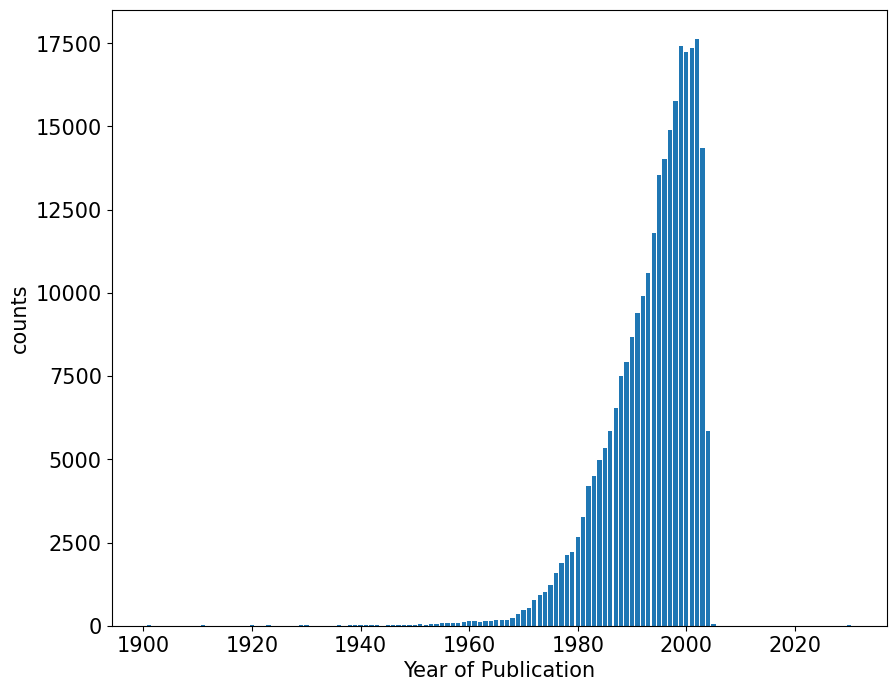

In [ ]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5)
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

<ipython-input-28-063b98a6a8c4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)


Text(0.5, 1.0, 'Explicit Ratings')

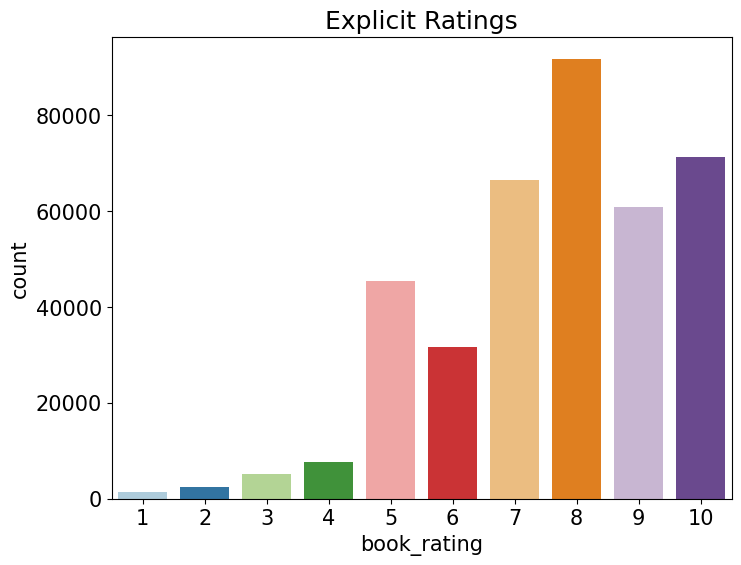

In [ ]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

In [ ]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

In [ ]:
ratings_explicit.head()

user_id        isbn  book_rating
1    276726  0155061224            5
3    276729  052165615X            3
4    276729  0521795028            6
8    276744  038550120X            7
16   276747  0060517794            9

In [ ]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


In [ ]:
# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
new_book_df.head()

isbn    book_title           book_author  year_of_publication  \
0  0002005018  Clara Callan  Richard Bruce Wright               2001.0   
1  0002005018  Clara Callan  Richard Bruce Wright               2001.0   
2  0002005018  Clara Callan  Richard Bruce Wright               2001.0   
3  0002005018  Clara Callan  Richard Bruce Wright               2001.0   
4  0002005018  Clara Callan  Richard Bruce Wright               2001.0   

               publisher  user_id  book_rating  
0  HarperFlamingo Canada        8            5  
1  HarperFlamingo Canada    11676            8  
2  HarperFlamingo Canada    67544            8  
3  HarperFlamingo Canada   116866            9  
4  HarperFlamingo Canada   123629            9

In [ ]:
new_book_df['book_title'].nunique()

135567

In [ ]:
new_book_df.dtypes

isbn                    object
book_title              object
book_author             object
year_of_publication    float64
publisher               object
user_id                  int64
book_rating              int64
dtype: object

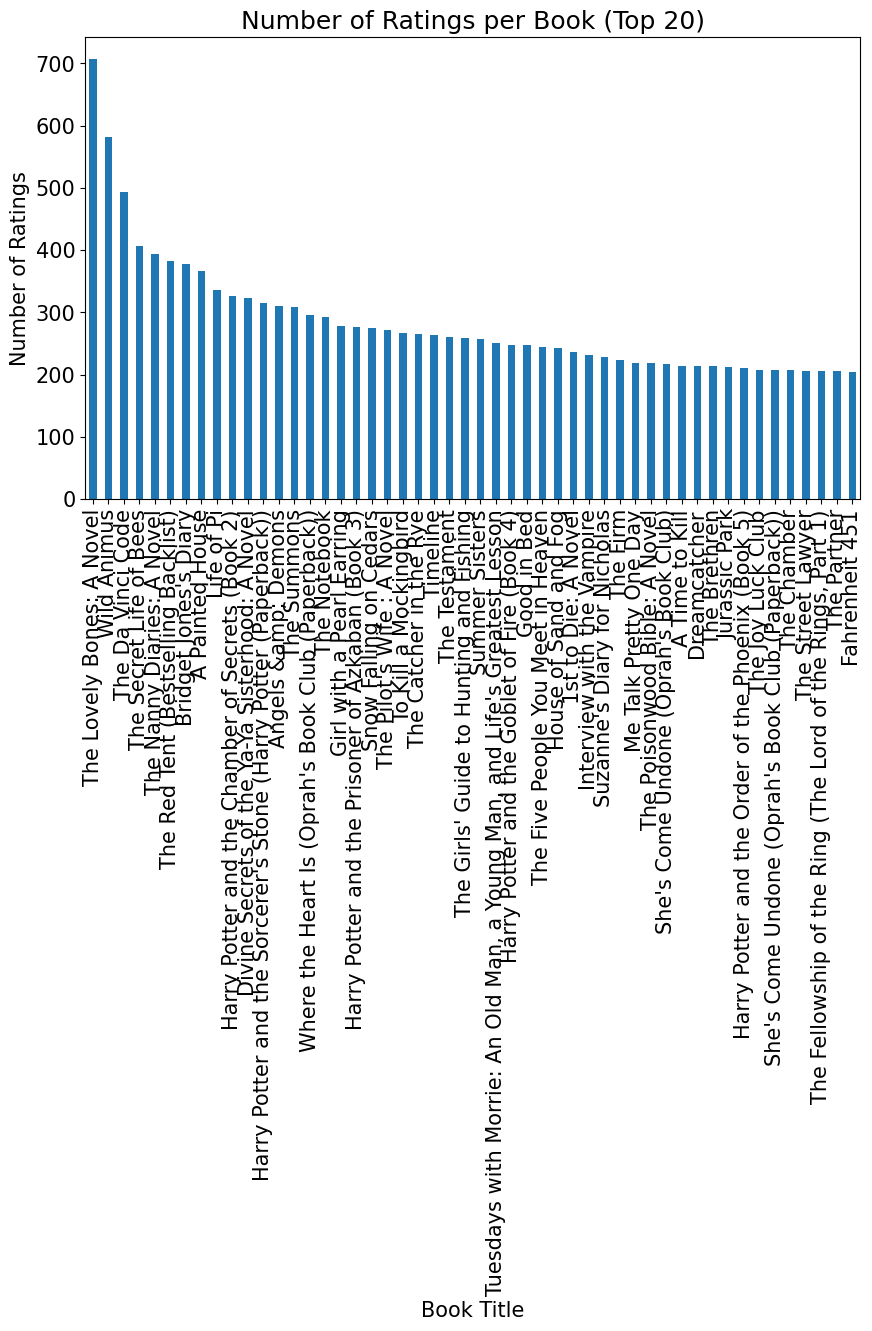

In [ ]:
import matplotlib.pyplot as plt

# Group by book title and count the number of ratings
ratings_count = new_book_df.groupby('book_title')['book_rating'].count()

# Plotting
plt.figure(figsize=(10,6))
ratings_count.sort_values(ascending=False).head(50).plot(kind='bar')
plt.title('Number of Ratings per Book (Top 20)')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

In [ ]:
avg_ratings = ratings_count.mean()
print("Average number of ratings received by any book:", avg_ratings)

Average number of ratings received by any book: 2.83138226854618


In [ ]:
num_books_no_ratings = (ratings_count == 0).sum()

print("Number of books that have not received any rating:", num_books_no_ratings)

Number of books that have not received any rating: 0


**My part to size reduce**

In [ ]:
import pandas as pd

# Assuming new_book_df is your DataFrame
# new_book_df = pd.merge(book_data, ratings_explicit, on='isbn')

# Step 1: Count the number of ratings per user
user_rating_counts = new_book_df['user_id'].value_counts()

# Step 2: Filter to retain only users who have rated at least 6 books
users_with_at_least_6_ratings = user_rating_counts[user_rating_counts >= 20].index

# Step 3: Filter the DataFrame to keep only these users
filtered_new_book_df = new_book_df[new_book_df['user_id'].isin(users_with_at_least_6_ratings)]

# Display the resulting DataFrame
filtered_new_book_df.head()


isbn                                         book_title  \
1   0002005018                                       Clara Callan   
3   0002005018                                       Clara Callan   
7   0002005018                                       Clara Callan   
8   0002005018                                       Clara Callan   
11  0374157065  Flu: The Story of the Great Influenza Pandemic...   

             book_author  year_of_publication              publisher  user_id  \
1   Richard Bruce Wright               2001.0  HarperFlamingo Canada    11676   
3   Richard Bruce Wright               2001.0  HarperFlamingo Canada   116866   
7   Richard Bruce Wright               2001.0  HarperFlamingo Canada   219008   
8   Richard Bruce Wright               2001.0  HarperFlamingo Canada   263325   
11      Gina Bari Kolata               1999.0   Farrar Straus Giroux    35704   

    book_rating  
1             8  
3             9  
7             7  
8             6  
11            6

In [ ]:
import pandas as pd

# Assuming new_book_df is your DataFrame
# new_book_df = pd.merge(book_data, ratings_explicit, on='isbn')

# Step 1: Count the number of ratings per user
#user_rating_counts = new_book_df['user_id'].value_counts()

# Step 2: Filter to retain only users who have rated at least 6 books
#users_with_at_least_6_ratings = user_rating_counts[user_rating_counts >= 20].index

# Step 3: Filter the DataFrame to keep only these users
#filtered_new_book_df = new_book_df[new_book_df['user_id'].isin(users_with_at_least_6_ratings)]

# Display the resulting DataFrame
#filtered_new_book_df.head()

# Calculate the count of each user ID in the filtered DataFrame
user_id_counts = filtered_new_book_df['user_id'].value_counts()

# Calculate the average count of any user ID being present in a row
avg_user_id_count = user_id_counts.mean()

# Print the count of each user ID
print("Count of each user ID in the filtered data:")
print(user_id_counts)

# Print the average count of any user ID being present in a row
print(f"\nAverage count of any user ID being present in a row: {avg_user_id_count}")

Count of each user ID in the filtered data:
user_id
11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
          ... 
72028       20
245649      20
173122      20
151824      20
229862      20
Name: count, Length: 3305, dtype: int64

Average count of any user ID being present in a row: 65.8786686838124


In [ ]:
import pandas as pd

# Assuming new_book_df is your DataFrame after merging book_data and ratings_explicit
# Assuming you have already filtered for users who have rated at least 6 books
# The previous filtering steps
#user_rating_counts = new_book_df['user_id'].value_counts()
#users_with_at_least_6_ratings = user_rating_counts[user_rating_counts >= 6].index
#filtered_new_book_df = new_book_df[new_book_df['user_id'].isin(users_with_at_least_6_ratings)]

# Count the number of unique books and users before filtering
initial_books_count = filtered_new_book_df['isbn'].nunique()
initial_users_count = filtered_new_book_df['user_id'].nunique()
print(f"Initial number of unique books: {initial_books_count}")
print(f"Initial number of unique users: {initial_users_count}")

# Step 1: Count the number of ratings per book
book_rating_counts = filtered_new_book_df['isbn'].value_counts()

# Step 2: Filter to retain only books rated by at least 19 users
books_with_at_least_20_ratings = book_rating_counts[book_rating_counts >= 22].index

# Step 3: Filter the DataFrame to keep only these books
final_filtered_new_book_df = filtered_new_book_df[filtered_new_book_df['isbn'].isin(books_with_at_least_20_ratings)]

# Count the number of unique books and users after filtering
final_books_count = final_filtered_new_book_df['isbn'].nunique()
final_users_count = final_filtered_new_book_df['user_id'].nunique()

# Display the resulting DataFrame and counts
print(final_filtered_new_book_df.head())
print(f"Final number of unique books: {final_books_count}")
print(f"Final number of unique users: {final_users_count}")


Initial number of unique books: 108380
Initial number of unique users: 3305
          isbn     book_title   book_author  year_of_publication publisher  \
48  0440234743  The Testament  John Grisham               1999.0      Dell   
51  0440234743  The Testament  John Grisham               1999.0      Dell   
52  0440234743  The Testament  John Grisham               1999.0      Dell   
55  0440234743  The Testament  John Grisham               1999.0      Dell   
59  0440234743  The Testament  John Grisham               1999.0      Dell   

    user_id  book_rating  
48     7346            9  
51    11224            6  
52    11676            9  
55    13552            8  
59    23511            8  
Final number of unique books: 657
Final number of unique users: 2895


In [ ]:
filtered_new_book_df.shape

(217729, 7)

In [ ]:
final_filtered_new_book_df.shape

(25911, 7)

In [ ]:
unique_users_count = filtered_new_book_df['user_id'].nunique()
print(f"Number of unique users: {unique_users_count}")

Number of unique users: 3305


In [ ]:
unique_users_count = final_filtered_new_book_df['user_id'].nunique()
print(f"Number of unique users: {unique_users_count}")

Number of unique users: 2895


In [ ]:
unique_books_count = final_filtered_new_book_df['isbn'].nunique()
print(f"Number of unique books: {unique_books_count}")

Number of unique books: 657


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming final_filtered_new_book_df is your DataFrame after filtering users with at least 6 ratings and books rated by at least 20 users
print(f"Initial number of rows: {final_filtered_new_book_df.shape[0]}")

# Split the data into training and testing sets
train_data, test_data = train_test_split(final_filtered_new_book_df, test_size=0.2, random_state=42)

# Ensure all users and items in the test set are present in the training set
train_users = set(train_data['user_id'])
train_items = set(train_data['isbn'])
#///////////////
# Extract unique user_ids and isbns from both the training and testing sets
train_users = set(train_data['user_id'])
train_isbns = set(train_data['isbn'])

test_users = set(test_data['user_id'])
test_isbns = set(test_data['isbn'])

# Check if all users and items in the test set are present in the training set
users_in_both = test_users.issubset(train_users)
isbns_in_both = test_isbns.issubset(train_isbns)

# Print the results
if users_in_both and isbns_in_both:
    print("All users and items in the test data are present in the train data.")
else:
    if not users_in_both:
        print("Some users in the test data are not present in the train data.")
        missing_users = test_users - train_users
        print(f"Missing users: {missing_users}")
        print(f"Number of missing users: {len(missing_users)}")
    if not isbns_in_both:
        print("Some items in the test data are not present in the train data.")
        missing_isbns = test_isbns - train_isbns
        print(f"Missing items: {missing_isbns}")
        print(f"Number of missing items: {len(missing_isbns)}")

#/////////////////////////



# Filter out test entries that have users or items not in the training set
test_data_filtered = test_data[test_data['user_id'].isin(train_users) & test_data['isbn'].isin(train_items)]

# Check if all users and items in test data are present in train data
all_users_in_train = test_data_filtered['user_id'].isin(train_users).all()
all_items_in_train = test_data_filtered['isbn'].isin(train_items).all()

# Print the statement if the condition is met
if all_users_in_train and all_items_in_train:
    print("All users and items in the test data are present in the train data.")
else:
    print("Some users or items in the test data are not present in the train data.")

# Count unique users and items in train, original test, and filtered test sets
unique_train_users = train_data['user_id'].nunique()
unique_train_items = train_data['isbn'].nunique()

unique_test_users = test_data['user_id'].nunique()
unique_test_items = test_data['isbn'].nunique()

unique_test_filtered_users = test_data_filtered['user_id'].nunique()
unique_test_filtered_items = test_data_filtered['isbn'].nunique()

# Print counts of unique users and items
print(f"Training data: {train_data.shape}")
print(f"Unique users in training data: {unique_train_users}")
print(f"Unique items in training data: {unique_train_items}")

print(f"Testing data (original): {test_data.shape}")
print(f"Unique users in original testing data: {unique_test_users}")
print(f"Unique items in original testing data: {unique_test_items}")

print(f"Testing data (filtered): {test_data_filtered.shape}")
print(f"Unique users in filtered testing data: {unique_test_filtered_users}")
print(f"Unique items in filtered testing data: {unique_test_filtered_items}")

# Save or use the final train and test data
train_data.to_csv('train_ratings.csv', index=False)
test_data_filtered.to_csv('test_ratings.csv', index=False)

# Check if any row in test data is also present in train data
common_rows = test_data.merge(train_data).shape[0]
if common_rows > 0:
    print(f"There are {common_rows} common rows between the train and test data.")
else:
    print("There are no common rows between the train and test data.")

Initial number of rows: 25911
Some users in the test data are not present in the train data.
Missing users: {122881, 239106, 643, 272897, 225411, 6532, 249096, 268171, 151824, 153361, 217106, 149907, 71831, 104604, 160541, 112672, 4385, 179744, 152483, 234023, 50859, 29101, 101550, 205487, 163759, 216882, 240051, 150067, 1211, 190789, 174534, 191560, 36554, 251467, 132173, 3917, 52175, 30029, 72785, 151762, 259155, 181076, 153174, 89307, 248540, 14173, 115678, 104413, 49889, 258913, 238179, 187747, 105956, 61798, 137190, 89192, 262634, 41450, 45418, 153322, 228206, 206959, 73196, 206202, 254971, 74493, 250494}
Number of missing users: 67
All users and items in the test data are present in the train data.
Training data: (20728, 7)
Unique users in training data: 2828
Unique items in training data: 657
Testing data (original): (5183, 7)
Unique users in original testing data: 1988
Unique items in original testing data: 657
Testing data (filtered): (5099, 7)
Unique users in filtered testing

In [ ]:
user_id_counts_train = train_data['user_id'].value_counts()

# Calculate the average count of any user ID being present in a row
avg_user_id_count_tr = user_id_counts_train.mean()

# Print the count of each user ID
print("Count of each user ID in the train data:")
print(user_id_counts_train)

# Print the average count of any user ID being present in a row
print(f"\nAverage count of any user ID being present in a row: {avg_user_id_count_tr}")


Count of each user ID in the train data:
user_id
11676     315
16795     102
95359      89
60244      68
104636     62
         ... 
74328       1
73548       1
25804       1
79556       1
137803      1
Name: count, Length: 2828, dtype: int64

Average count of any user ID being present in a row: 7.32956152758133


In [ ]:
user_id_counts_test = test_data_filtered['user_id'].value_counts()

# Calculate the average count of any user ID being present in a row
avg_user_id_count_ts = user_id_counts_test.mean()

# Print the count of each user ID
print("Count of each user ID in the train data:")
print(user_id_counts_test)

# Print the average count of any user ID being present in a row
print(f"\nAverage count of any user ID being present in a row: {avg_user_id_count_ts}")

Count of each user ID in the train data:
user_id
11676     76
95359     27
16795     25
104636    18
140358    17
          ..
135776     1
114813     1
271284     1
189104     1
37293      1
Name: count, Length: 1921, dtype: int64

Average count of any user ID being present in a row: 2.6543466944299845


In [ ]:
train_data.dtypes

isbn                    object
book_title              object
book_author             object
year_of_publication    float64
publisher               object
user_id                  int64
book_rating              int64
dtype: object

In [ ]:
train_data

isbn                                         book_title  \
13347   0380710218                                         Postmortem   
134815  0440223202                                      Evening Class   
55208   0439064872   Harry Potter and the Chamber of Secrets (Book 2)   
69567   0345413350    The Golden Compass (His Dark Materials, Book 1)   
107398  0064471047  The Lion, the Witch, and the Wardrobe (The Chr...   
...            ...                                                ...   
95744   0553280368  C Is for Corpse (Kinsey Millhone Mysteries (Pa...   
18256   0446531332                                 Nights in Rodanthe   
2775    0316769487                             The Catcher in the Rye   
61593   074343627X                                       Dreamcatcher   
116240  0446675059                   The Honk and Holler Opening Soon   

                      book_author  year_of_publication  \
13347   Patricia Daniels Cornwell               1993.0   
134815               Maeve Binchy               1998.0   
55208               J. K. Rowling               2000.0   
69567              PHILIP PULLMAN               1997.0   
107398                C. S. Lewis               1994.0   
...                           ...                  ...   
95744                 Sue Grafton               1987.0   
18256             Nicholas Sparks               2002.0   
2775                J.D. Salinger               1991.0   
61593                Stephen King               2001.0   
116240               Billie Letts               1999.0   

                                 publisher  user_id  book_rating  
13347   Harper Mass Market Paperbacks (Mm)    30972            8  
134815             Dell Publishing Company   110440           10  
55208                           Scholastic   278356            8  
69567                              Del Rey    81263           10  
107398                       HarperCollins    60244            9  
...                                    ...      ...          ...  
95744                               Bantam   139913           10  
18256                         Warner Books      638           10  
2775                         Little, Brown   206944            7  
61593                               Pocket   128835            9  
116240                        Warner Books   224430            9  

[20728 rows x 7 columns]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming final_filtered_new_book_df is your DataFrame after filtering users with at least 6 ratings and books rated by at least 20 users
# Split the data into training and testing sets
#train_data, test_data = train_test_split(final_filtered_new_book_df, test_size=0.2, random_state=42)

# Step 1: Create the User-Book matrix from the training data
user_book_matrix = train_data.pivot(index='user_id', columns='isbn', values='book_rating')

# Step 2: Fill NaN values with 0
user_book_matrix = user_book_matrix.fillna(0)
print("There are no common rows between the train and test data.")

There are no common rows between the train and test data.


In [ ]:
user_book_matrix

isbn     002542730X  0060096195  006016848X  0060391626  0060392452  \
user_id                                                               
254             0.0         0.0         0.0         0.0         0.0   
507             0.0         0.0         0.0         0.0         0.0   
638             0.0         0.0         0.0         0.0         0.0   
709             0.0         0.0         0.0         0.0         0.0   
805             0.0         0.0         0.0         0.0         0.0   
...             ...         ...         ...         ...         ...   
278221          0.0         0.0         0.0         0.0         0.0   
278356          0.0         0.0         0.0         0.0         0.0   
278418          0.0         0.0         0.0         0.0         0.0   
278582          0.0         0.0         0.0         0.0         0.0   
278633          0.0         0.0         0.0         0.0         0.0   

isbn     0060502258  0060915544  0060916508  0060921145  0060928336  \
user_id                                                               
254             0.0         0.0         0.0         0.0         0.0   
507             0.0         0.0         0.0         0.0         0.0   
638             0.0         0.0         0.0         0.0         0.0   
709             0.0         0.0         0.0         0.0         0.0   
805             0.0         0.0         0.0         0.0         7.0   
...             ...         ...         ...         ...         ...   
278221          0.0         0.0         0.0         0.0         0.0   
278356          0.0         0.0         0.0         0.0         0.0   
278418          0.0         0.0         0.0         0.0         0.0   
278582          0.0         0.0         0.0         0.0         0.0   
278633          0.0         0.0         0.0         0.0         0.0   

isbn     0060929790  0060929871  0060930535  0060934417  0060938455  \
user_id                                                               
254             0.0         0.0         0.0         0.0         0.0   
507             0.0         0.0         0.0         0.0         0.0   
638             0.0         0.0         0.0         0.0         0.0   
709             0.0         0.0         0.0         0.0         0.0   
805             0.0         0.0         0.0         0.0         0.0   
...             ...         ...         ...         ...         ...   
278221          0.0         0.0         0.0         0.0         0.0   
278356          0.0         0.0         0.0         0.0         0.0   
278418          0.0         0.0         0.0         0.0         0.0   
278582          0.0         0.0         0.0         0.0         0.0   
278633          0.0         0.0         0.0         0.0         0.0   

isbn     0060958022  0060959037  0060976845  0060977493  0060987103  \
user_id                                                               
254             0.0         0.0         0.0         0.0         0.0   
507             0.0         0.0         0.0         0.0         0.0   
638             0.0         0.0         0.0         0.0         0.0   
709             0.0         0.0         0.0         0.0         0.0   
805             0.0         0.0         0.0         0.0         0.0   
...             ...         ...         ...         ...         ...   
278221          0.0         0.0         0.0         0.0         0.0   
278356          0.0         0.0         0.0         0.0         0.0   
278418          0.0         0.0         0.0         0.0         0.0   
278582          0.0         0.0         0.0         0.0         0.0   
278633          0.0         0.0         0.0         0.0         0.0   

isbn     0060987529  0060987561  006099486X  0061009059  006101351X  \
user_id                                                               
254             0.0         0.0         0.0         0.0         0.0   
507             0.0         0.0         0.0         0.0         0.0   
638             0.0 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between users
user_similarity_matrix = cosine_similarity(user_book_matrix)

# Fill the diagonal elements with zeros to avoid self-similarity
np.fill_diagonal(user_similarity_matrix, 0)

# Show the user-user similarity matrix
user_similarity_matrix_df = pd.DataFrame(user_similarity_matrix, index=user_book_matrix.index, columns=user_book_matrix.index)
print("User-User Similarity Matrix:")
user_similarity_matrix_df

User-User Similarity Matrix:


user_id    254       507     638     709     805       882     929     \
user_id                                                                 
254      0.000000  0.279347     0.0     0.0     0.0  0.000000     0.0   
507      0.279347  0.000000     0.0     0.0     0.0  0.000000     0.0   
638      0.000000  0.000000     0.0     0.0     0.0  0.155643     0.0   
709      0.000000  0.000000     0.0     0.0     0.0  0.000000     0.0   
805      0.000000  0.000000     0.0     0.0     0.0  0.000000     0.0   
...           ...       ...     ...     ...     ...       ...     ...   
278221   0.000000  0.000000     0.0     0.0     0.0  0.000000     0.0   
278356   0.247424  0.000000     0.0     0.0     0.0  0.000000     0.0   
278418   0.000000  0.000000     0.0     0.0     0.0  0.000000     0.0   
278582   0.000000  0.000000     0.0     0.0     0.0  0.000000     0.0   
278633   0.000000  0.000000     0.0     0.0     0.0  0.000000     0.0   

user_id    1025    1131      1424    1435    1674    1733    1848      1903    \
user_id                                                                         
254      0.000000     0.0  0.000000     0.0     0.0     0.0     0.0  0.000000   
507      0.000000     0.0  0.000000     0.0     0.0     0.0     0.0  0.000000   
638      0.000000     0.0  0.000000     0.0     0.0     0.0     0.0  0.000000   
709      0.000000     0.0  0.000000     0.0     0.0     0.0     0.0  0.000000   
805      0.178562     0.0  0.000000     0.0     0.0     0.0     0.0  0.329252   
...           ...     ...       ...     ...     ...     ...     ...       ...   
278221   0.000000     0.0  0.426401     0.0     0.0     0.0     0.0  0.000000   
278356   0.000000     0.0  0.000000     0.0     0.0     0.0     0.0  0.000000   
278418   0.000000     0.0  0.000000     0.0     0.0     0.0     0.0  0.000000   
278582   0.000000     0.0  0.000000     0.0     0.0     0.0     0.0  0.000000   
278633   0.000000     0.0  0.000000     0.0     0.0     0.0     0.0  0.000000   

user_id  2030      2033    2110      2179    2276    2313      2766    \
user_id                                                                 
254         0.0  0.262115     0.0  0.227153     0.0     0.0  0.000000   
507         0.0  0.000000     0.0  0.000000     0.0     0.0  0.000000   
638         0.0  0.000000     0.0  0.145803     0.0     0.0  0.000000   
709         0.0  0.000000     0.0  0.000000     0.0     0.0  0.241414   
805         0.0  0.000000     0.0  0.000000     0.0     0.0  0.000000   
...         ...       ...     ...       ...     ...     ...       ...   
278221      0.0  0.000000     0.0  0.000000     0.0     0.0  0.000000   
278356      0.0  0.230857     0.0  0.000000     0.0     0.0  0.000000   
278418      0.0  0.000000     0.0  0.000000     0.0     0.0  0.000000   
278582      0.0  0.000000     0.0  0.000000     0.0     0.0  0.000000   
278633      0.0  0.000000     0.0  0.000000     0.0     0.0  0.110431   

user_id    2891      2977      3167    3346      3363      3371    3373    \
user_id                                                                     
254      0.098017  0.000000  0.000000     0.0  0.000000  0.000000     0.0   
507      0.350878  0.000000  0.000000     0.0  0.000000  0.000000     0.0   
638      0.000000  0.000000  0.000000     0.0  0.000000  0.000000     0.0   
709      0.000000  0.000000  0.324847     0.0  0.000000  0.000000     0.0   
805      0.000000  0.276882  0.000000     0.0  0.000000  0.000000     0.0   
...           ...       ...       ...     ...       ...       ...     ...   
278221   0.350878  0.000000  0.000000     0.0  0.000000  0.000000     0.0   
278356   0.000000  0.000000  0.000000     0.0  0.000000  0.000000     0.0   
278418   0.000000  0.000000  0.000000     0.0  0.000000  0.000000     0.0   
278582   0.000000  0.000000  0.000000     0.0  0.000000  0.000000     0.0   
278633   0.000000  0.000000  0.000000     0.0  0.143122  0.165031     0.0   

user_id    3556    3827    3923      4017   

In [ ]:
# Count of unique users in the user-user similarity matrix
unique_users_in_similarity_matrix = len(user_similarity_matrix)
print("Count of unique users in user-user similarity matrix:", unique_users_in_similarity_matrix)

# Count of unique users in the filtered DataFrame
unique_users_in_train_data = len(train_data['user_id'].unique())
print("Count of unique users in train DataFrame:", unique_users_in_train_data)

unique_users_in_test_data = len(test_data_filtered['user_id'].unique())
print("Count of unique users in test DataFrame:", unique_users_in_test_data)

Count of unique users in user-user similarity matrix: 2828
Count of unique users in train DataFrame: 2828
Count of unique users in test DataFrame: 1921


In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357253 sha256=7160a80fc61222d3b93dce7c20ce153d67d844ffb40f8f6153099a09b66c3320
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
rmse_list = []
mae_list = []
algorithm_names = []


**1.SVD**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise import accuracy

# Assuming train_data and test_data_filtered DataFrames are already available
# with columns 'user_id', 'isbn', and 'book_rating'

# Adjust the rating scale according to your dataset
rating_scale = (1, 10)  # Example scale, change to (1, 5) if your ratings are 1 to 5

# Prepare the data for the Surprise library
reader = Reader(rating_scale=rating_scale)
train_data_surprise = Dataset.load_from_df(train_data[['user_id', 'isbn', 'book_rating']], reader)

# Trainset needs to be constructed from the full train data
trainset = train_data_surprise.build_full_trainset()

# Instantiate the SVD model
svd_model = SVD()

# Train the model
svd_model.fit(trainset)

# Prepare the test set for prediction
testset = []
for index, row in test_data_filtered.iterrows():
    testset.append((row['user_id'], row['isbn'], row['book_rating']))

# Make predictions on the test set
predictions = svd_model.test(testset)

# Extract the results
results = [(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in predictions]

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Calculate RMSE and MAE
rmse_val = accuracy.rmse(predictions, verbose=True)
mae_val = accuracy.mae(predictions, verbose=True)

# Display the results DataFrame
print("Prediction Results for All Test Users (SVD):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")

# Append results to the lists
#algorithm_names.append('SVD')
#rmse_list.append(rmse_val)
#mae_list.append(mae_val)



RMSE: 1.5689
MAE:  1.2091
Prediction Results for All Test Users (SVD):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.976515
1       50225  0679731148              7          7.510694
2       86189  067976402X              5          6.908120
3      269566  002542730X              7          7.570918
4      114085  0842332251             10          8.348357
...       ...         ...            ...               ...
5094   241980  0312306326             10          9.029601
5095   234828  042513525X              8          7.316464
5096     1424  0767902521              8          7.847049
5097    95359  0385472951              4          8.000269
5098    37293  034541389X              8          7.508214

[5099 rows x 4 columns]
RMSE: 1.5689017238840737
MAE: 1.2091140216871208


**2.SVD + KNN**

**Novel Implementation**

**New Novel**

**weighted knn**

In [ ]:
# Function to find the top k neighbors for a given user
def find_top_k_neighbors(user_id, k=40):
    if user_id in user_similarity_matrix_df.index:
        user_similarities = user_similarity_matrix_df.loc[user_id]
        top_k_neighbors = user_similarities.nlargest(k).index
        return top_k_neighbors
    else:
        return []

def predict_rating(user_id, book_id, k=40):
    neighbors = find_top_k_neighbors(user_id, k)
    numerator = 0
    denominator = 0
    for neighbor in neighbors:
        similarity_score = user_similarity_matrix_df.loc[user_id, neighbor]
        rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
        if rating_by_neighbor > 0:  # Only consider non-zero ratings
            numerator += similarity_score * rating_by_neighbor
            denominator += abs(similarity_score)

    if denominator == 0:  # If no neighbors have rated the book
        user_ratings = user_book_matrix.loc[user_id]
        user_avg_rating = user_ratings[user_ratings > 0].mean()  # Use user's average rating as fallback
        return user_avg_rating

    return numerator / denominator

for index, row in test_data_filtered.iloc[:10].iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Find top 40 neighbors
    top_k_neighbors = find_top_k_neighbors(user_id, k=40)
    print(f"Top 40 neighbors for user {user_id}: {top_k_neighbors.tolist()}")
    results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Find top 40 neighbors
    top_k_neighbors = find_top_k_neighbors(user_id, k=40)
    predicted_rating = predict_rating(user_id, book_id)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users:")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
algorithm_names.append('Cosine + weighted knn')
rmse_list.append(rmse)
mae_list.append(mae)


Top 40 neighbors for user 14422: [177879, 55751, 8167, 141310, 248138, 144516, 101876, 179288, 220122, 219951, 250342, 269728, 104812, 62464, 40943, 153653, 250709, 185147, 21484, 33862, 184513, 1025, 28619, 174596, 110373, 267249, 53278, 13273, 89507, 184789, 182969, 221655, 209464, 147965, 163433, 2313, 208829, 264355, 208147, 48579]
Top 40 neighbors for user 50225: [173111, 67542, 81855, 159033, 39467, 183958, 52293, 20172, 275220, 128332, 246156, 15819, 20060, 25601, 157247, 241565, 218068, 176875, 88620, 154543, 193750, 82893, 206563, 67663, 178797, 168642, 57725, 62966, 252827, 246634, 188022, 90391, 37556, 249989, 101305, 10118, 118677, 248468, 223231, 3827]
Top 40 neighbors for user 86189: [53729, 47279, 139467, 233041, 250342, 272715, 255218, 244736, 90616, 246634, 168816, 41177, 131686, 71470, 203044, 184789, 276670, 507, 18323, 210959, 259118, 221948, 174092, 48037, 38950, 60583, 247055, 96554, 267510, 135609, 57449, 132171, 243745, 71587, 242309, 180348, 176348, 209817, 463

In [ ]:
test_data_filtered.shape

(5099, 7)

**Basic knn**

In [ ]:
def predict_rating_basic_knn(user_id, book_id, k=40):
    neighbors = find_top_k_neighbors(user_id, k)
    total_rating = 0
    count = 0
    for neighbor in neighbors:
        rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
        if rating_by_neighbor > 0:  # Only consider non-zero ratings
            total_rating += rating_by_neighbor
            count += 1

    if count == 0:  # If no neighbors have rated the book
        user_ratings = user_book_matrix.loc[user_id]
        user_avg_rating = user_ratings[user_ratings > 0].mean()  # Use user's average rating as fallback
        return user_avg_rating

    return total_rating / count

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Find top 40 neighbors
    top_k_neighbors = find_top_k_neighbors(user_id, k=40)
    predicted_rating = predict_rating_basic_knn(user_id, book_id)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (Basic KNN):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
algorithm_names.append('Cosine + Basic knn')
rmse_list.append(rmse)
mae_list.append(mae)


Prediction Results for All Test Users (Basic KNN):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.823529
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          6.777778
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          8.666667
...       ...         ...            ...               ...
5094   241980  0312306326             10          7.500000
5095   234828  042513525X              8          7.735294
5096     1424  0767902521              8          7.000000
5097    95359  0385472951              4          8.500000
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.9272835804651465
MAE: 1.4416930415709517


**knn means + cosine**

In [ ]:
def predict_rating_knn_means(user_id, book_id, k=40):
    neighbors = find_top_k_neighbors(user_id, k)
    user_mean_rating = user_book_matrix.loc[user_id].replace(0, np.nan).mean()

    numerator = 0
    denominator = 0
    for neighbor in neighbors:
        neighbor_mean_rating = user_book_matrix.loc[neighbor].replace(0, np.nan).mean()
        rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
        if rating_by_neighbor > 0:  # Only consider non-zero ratings
            numerator += (rating_by_neighbor - neighbor_mean_rating) * user_similarity_matrix_df.loc[user_id, neighbor]
            denominator += abs(user_similarity_matrix_df.loc[user_id, neighbor])

    if denominator == 0:  # If no neighbors have rated the book
        return user_mean_rating  # Use user's mean rating as fallback

    return user_mean_rating + (numerator / denominator)

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Find top 40 neighbors
    top_k_neighbors = find_top_k_neighbors(user_id, k=40)
    predicted_rating = predict_rating_knn_means(user_id, book_id)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (KNN with Means):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
algorithm_names.append('Cosine + knn means')
rmse_list.append(rmse)
mae_list.append(mae)


Prediction Results for All Test Users (KNN with Means):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.823529
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          6.777778
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          8.905687
...       ...         ...            ...               ...
5094   241980  0312306326             10          8.376725
5095   234828  042513525X              8          7.735294
5096     1424  0767902521              8          7.000000
5097    95359  0385472951              4          8.905397
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.8057112061612859
MAE: 1.3511829235259998


**knn zscore**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming train_data and test_data_filtered DataFrames are already available

# Step 1: Create the User-Book matrix from the training data
#user_book_matrix = train_data.pivot(index='user_id', columns='isbn', values='book_rating').fillna(0)

# Step 2: Calculate the cosine similarity between users
user_similarity_matrix = cosine_similarity(user_book_matrix)
np.fill_diagonal(user_similarity_matrix, 0)

# Convert similarity matrix to DataFrame
user_similarity_matrix_df = pd.DataFrame(user_similarity_matrix, index=user_book_matrix.index, columns=user_book_matrix.index)

# Function to find the top k neighbors for a given user
def find_top_k_neighbors(user_id, k=40):
    if user_id in user_similarity_matrix_df.index:
        user_similarities = user_similarity_matrix_df.loc[user_id]
        top_k_neighbors = user_similarities.nlargest(k).index
        return top_k_neighbors
    else:
        return []

# Function to predict rating for a given user and book with Z-score normalization (KNN with Z-score)
def predict_rating_knn_zscore(user_id, book_id, k=40):
    neighbors = find_top_k_neighbors(user_id, k)
    user_mean_rating = user_book_matrix.loc[user_id].replace(0, np.nan).mean()
    user_std_rating = user_book_matrix.loc[user_id].replace(0, np.nan).std()

    # Handle zero standard deviation by using user's mean rating
    if user_std_rating == 0:
        return user_mean_rating

    numerator = 0
    denominator = 0
    for neighbor in neighbors:
        neighbor_mean_rating = user_book_matrix.loc[neighbor].replace(0, np.nan).mean()
        neighbor_std_rating = user_book_matrix.loc[neighbor].replace(0, np.nan).std()

        # Handle zero standard deviation for neighbors
        if neighbor_std_rating > 0:
            rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
            if rating_by_neighbor > 0:  # Only consider non-zero ratings
                z_score = (rating_by_neighbor - neighbor_mean_rating) / neighbor_std_rating
                numerator += z_score * user_similarity_matrix_df.loc[user_id, neighbor]
                denominator += abs(user_similarity_matrix_df.loc[user_id, neighbor])

    if denominator == 0:  # If no neighbors have rated the book
        return user_mean_rating  # Use user's mean rating as fallback

    z_score_prediction = numerator / denominator
    return user_mean_rating + z_score_prediction * user_std_rating

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Find top 40 neighbors
    top_k_neighbors = find_top_k_neighbors(user_id, k=40)
    predicted_rating = predict_rating_knn_zscore(user_id, book_id)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Handle any potential NaN values in predicted ratings
results_df['predicted_rating'].fillna(results_df['actual_rating'].mean(), inplace=True)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (KNN with Z-score):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
algorithm_names.append('Cosine + Knn with Z-score')
rmse_list.append(rmse)
mae_list.append(mae)



Prediction Results for All Test Users (KNN with Z-score):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.823529
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          6.777778
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          9.000249
...       ...         ...            ...               ...
5094   241980  0312306326             10          8.673143
5095   234828  042513525X              8          7.735294
5096     1424  0767902521              8          7.000000
5097    95359  0385472951              4          8.722764
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.7931068422386622
MAE: 1.3197417003731944


**pearson and KNN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming train_data and test_data_filtered DataFrames are already available

# Step 1: Create the User-Book matrix from the training data
#user_book_matrix = train_data.pivot(index='user_id', columns='isbn', values='book_rating').fillna(0)

# Function to calculate Pearson correlation similarity between users
def calculate_pearson_similarity(user_book_matrix):
    similarity_matrix = user_book_matrix.T.corr(method='pearson')
    return similarity_matrix

# Step 2: Calculate the Pearson similarity matrix
user_similarity_matrix_pearson = calculate_pearson_similarity(user_book_matrix)

# Function to find the top k neighbors for a given user
def find_top_k_neighbors(user_id, similarity_matrix, k=40):
    if user_id in similarity_matrix.index:
        user_similarities = similarity_matrix.loc[user_id]
        top_k_neighbors = user_similarities.nlargest(k + 1).iloc[1:].index  # Exclude the user itself
        return top_k_neighbors
    else:
        return []

# Function to predict rating for a given user and book using Pearson similarity (KNN with basic approach)
def predict_rating_knn_pearson(user_id, book_id, similarity_matrix, k=40):
    neighbors = find_top_k_neighbors(user_id, similarity_matrix, k)
    total_rating = 0
    count = 0
    for neighbor in neighbors:
        rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
        if rating_by_neighbor > 0:  # Only consider non-zero ratings
            total_rating += rating_by_neighbor
            count += 1

    if count == 0:  # If no neighbors have rated the book
        user_ratings = user_book_matrix.loc[user_id]
        user_avg_rating = user_ratings[user_ratings > 0].mean()  # Use user's average rating as fallback
        return user_avg_rating

    return total_rating / count

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using Pearson similarity
    predicted_rating = predict_rating_knn_pearson(user_id, book_id, user_similarity_matrix_pearson)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (KNN with Pearson Similarity):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
algorithm_names.append('Pearson+ knn')
rmse_list.append(rmse)
mae_list.append(mae)



Prediction Results for All Test Users (KNN with Pearson Similarity):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.823529
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          6.777778
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          8.666667
...       ...         ...            ...               ...
5094   241980  0312306326             10          8.000000
5095   234828  042513525X              8          7.735294
5096     1424  0767902521              8          7.000000
5097    95359  0385472951              4          8.000000
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.8866949460862268
MAE: 1.4096878043496655


**KNN baseline + pearson**

**pearson + knn means**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming train_data and test_data_filtered DataFrames are already available

# Step 1: Create the User-Book matrix from the training data
#user_book_matrix = train_data.pivot(index='user_id', columns='isbn', values='book_rating').fillna(0)

# Function to calculate Pearson correlation similarity between users
def calculate_pearson_similarity(user_book_matrix):
    similarity_matrix = user_book_matrix.T.corr(method='pearson')
    return similarity_matrix

# Step 2: Calculate the Pearson similarity matrix
user_similarity_matrix_pearson = calculate_pearson_similarity(user_book_matrix)

# Function to find the top k neighbors for a given user
def find_top_k_neighbors(user_id, similarity_matrix, k=40):
    if user_id in similarity_matrix.index:
        user_similarities = similarity_matrix.loc[user_id]
        top_k_neighbors = user_similarities.nlargest(k + 1).iloc[1:].index  # Exclude the user itself
        return top_k_neighbors
    else:
        return []

# Function to predict rating for a given user and book using Pearson similarity (KNN with Means)
def predict_rating_knn_means(user_id, book_id, similarity_matrix, k=40):
    neighbors = find_top_k_neighbors(user_id, similarity_matrix, k)
    user_mean_rating = user_book_matrix.loc[user_id].replace(0, np.nan).mean()

    numerator = 0
    denominator = 0
    for neighbor in neighbors:
        neighbor_mean_rating = user_book_matrix.loc[neighbor].replace(0, np.nan).mean()
        rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
        if rating_by_neighbor > 0:  # Only consider non-zero ratings
            numerator += (rating_by_neighbor - neighbor_mean_rating) * similarity_matrix.loc[user_id, neighbor]
            denominator += abs(similarity_matrix.loc[user_id, neighbor])

    if denominator == 0:  # If no neighbors have rated the book
        return user_mean_rating  # Use user's mean rating as fallback

    return user_mean_rating + (numerator / denominator)

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using Pearson similarity with means adjustment
    predicted_rating = predict_rating_knn_means(user_id, book_id, user_similarity_matrix_pearson)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (KNN with Pearson Similarity and Means):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
#algorithm_names.append('Pearson + KNN means')
#rmse_list.append(rmse)
#mae_list.append(mae)



Prediction Results for All Test Users (KNN with Pearson Similarity and Means):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.823529
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          6.777778
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          8.907787
...       ...         ...            ...               ...
5094   241980  0312306326             10          9.598214
5095   234828  042513525X              8          7.735294
5096     1424  0767902521              8          7.000000
5097    95359  0385472951              4          8.000000
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.7717453468091404
MAE: 1.3267333027369255


**KNN zscore + pearson**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming train_data and test_data_filtered DataFrames are already available

# Step 1: Create the User-Book matrix from the training data
#user_book_matrix = train_data.pivot(index='user_id', columns='isbn', values='book_rating').fillna(0)

# Function to calculate Pearson correlation similarity between users
def calculate_pearson_similarity(user_book_matrix):
    similarity_matrix = user_book_matrix.T.corr(method='pearson')
    return similarity_matrix

# Step 2: Calculate the Pearson similarity matrix
user_similarity_matrix_pearson = calculate_pearson_similarity(user_book_matrix)

# Function to find the top k neighbors for a given user
def find_top_k_neighbors(user_id, similarity_matrix, k=40):
    if user_id in similarity_matrix.index:
        user_similarities = similarity_matrix.loc[user_id]
        top_k_neighbors = user_similarities.nlargest(k + 1).iloc[1:].index  # Exclude the user itself
        return top_k_neighbors
    else:
        return []

# Function to predict rating for a given user and book using Pearson similarity (KNN with Z-score normalization)
def predict_rating_knn_zscore(user_id, book_id, similarity_matrix, k=40):
    neighbors = find_top_k_neighbors(user_id, similarity_matrix, k)
    user_mean_rating = user_book_matrix.loc[user_id].replace(0, np.nan).mean()
    user_std_rating = user_book_matrix.loc[user_id].replace(0, np.nan).std()

    # Handle zero standard deviation by using user's mean rating
    if user_std_rating == 0:
        return user_mean_rating

    numerator = 0
    denominator = 0
    for neighbor in neighbors:
        neighbor_mean_rating = user_book_matrix.loc[neighbor].replace(0, np.nan).mean()
        neighbor_std_rating = user_book_matrix.loc[neighbor].replace(0, np.nan).std()

        # Handle zero standard deviation for neighbors
        if neighbor_std_rating > 0:
            rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
            if rating_by_neighbor > 0:  # Only consider non-zero ratings
                z_score = (rating_by_neighbor - neighbor_mean_rating) / neighbor_std_rating
                numerator += z_score * similarity_matrix.loc[user_id, neighbor]
                denominator += abs(similarity_matrix.loc[user_id, neighbor])

    if denominator == 0:  # If no neighbors have rated the book
        return user_mean_rating  # Use user's mean rating as fallback

    z_score_prediction = numerator / denominator
    prediction = user_mean_rating + z_score_prediction * user_std_rating

    # Ensure the predicted rating falls within the expected range (e.g., 1 to 10)
    prediction = max(1, min(10, prediction))

    return prediction

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using Pearson similarity with Z-score normalization
    predicted_rating = predict_rating_knn_zscore(user_id, book_id, user_similarity_matrix_pearson)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Handle any potential NaN values in predicted ratings
results_df['predicted_rating'].fillna(results_df['actual_rating'].mean(), inplace=True)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (KNN with Pearson Similarity and Z-score):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


Prediction Results for All Test Users (KNN with Pearson Similarity and Z-score):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.823529
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          6.777778
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          9.001158
...       ...         ...            ...               ...
5094   241980  0312306326             10          9.576928
5095   234828  042513525X              8          7.735294
5096     1424  0767902521              8          7.000000
5097    95359  0385472951              4          8.000000
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.7569789120376522
MAE: 1.2973786872837423


**New knn**

In [ ]:
# Function to calculate mean and variance of item ratings
def calculate_mean_variance(user_book_matrix):
    item_means = user_book_matrix.mean(axis=0)
    item_variances = user_book_matrix.var(axis=0)
    return item_means, item_variances

item_means, item_variances = calculate_mean_variance(user_book_matrix)


In [ ]:
# Function to calculate VMD between items
def calculate_vmd(item_means, item_variances, alpha=1.0):
    item_indices = item_means.index
    vmd_matrix = pd.DataFrame(index=item_indices, columns=item_indices)

    for i in item_indices:
        for j in item_indices:
            vmd = abs(item_means[i] - item_means[j]) + alpha * abs(item_variances[i] - item_variances[j])
            vmd_matrix.loc[i, j] = vmd

    return vmd_matrix.astype(float)

# Step 2: Calculate the VMD matrix
vmd_matrix = calculate_vmd(item_means, item_variances)


In [ ]:
# Function to find the top k neighbors for a given item using VMD
def find_top_k_neighbors_vmd(item_id, vmd_matrix, k=40):
    if item_id in vmd_matrix.index:
        item_similarities = vmd_matrix.loc[item_id]
        top_k_neighbors = item_similarities.nsmallest(k + 1).iloc[1:].index  # Exclude the item itself
        return top_k_neighbors
    else:
        return []

# Example usage:
# neighbors = find_top_k_neighbors_vmd('some_book_id', vmd_matrix, k=40)


In [ ]:
# Function to predict rating for a given user and book using VMD (KNN with Mean and Variance)
def predict_rating_ivmrs(user_id, book_id, user_book_matrix, vmd_matrix, k=40):
    neighbors = find_top_k_neighbors_vmd(book_id, vmd_matrix, k)
    ratings = user_book_matrix.loc[user_id, neighbors]
    valid_ratings = ratings[ratings > 0]  # Only consider non-zero ratings

    if len(valid_ratings) == 0:
        return user_book_matrix.loc[user_id].replace(0, np.nan).mean()  # Use user's mean rating as fallback

    prediction = valid_ratings.mean()

    # Ensure the predicted rating falls within the expected range (e.g., 1 to 10)
    prediction = max(1, min(10, prediction))

    return prediction

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using IVMRS approach
    predicted_rating = predict_rating_ivmrs(user_id, book_id, user_book_matrix, vmd_matrix)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Handle any potential NaN values in predicted ratings
results_df['predicted_rating'].fillna(results_df['actual_rating'].mean(), inplace=True)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (IVMRS with VMD):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
algorithm_names.append('IVMRS+ KNN')
rmse_list.append(rmse)
mae_list.append(mae)


Prediction Results for All Test Users (IVMRS with VMD):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.000000
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          8.000000
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          9.250000
...       ...         ...            ...               ...
5094   241980  0312306326             10          9.312500
5095   234828  042513525X              8          5.666667
5096     1424  0767902521              8          8.000000
5097    95359  0385472951              4          9.500000
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.832831401282739
MAE: 1.3235105599209924


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming train_data and test_data_filtered DataFrames are already available

# Step 1: Create the User-Book matrix from the training data
#user_book_matrix = train_data.pivot(index='user_id', columns='isbn', values='book_rating').fillna(0)

# Function to calculate mean and variance of item ratings
def calculate_mean_variance(user_book_matrix):
    item_means = user_book_matrix.mean(axis=0)
    item_variances = user_book_matrix.var(axis=0)
    return item_means, item_variances

item_means, item_variances = calculate_mean_variance(user_book_matrix)

# Function to calculate VMD between items
def calculate_vmd(item_means, item_variances, alpha=1.0):
    item_indices = item_means.index
    vmd_matrix = pd.DataFrame(index=item_indices, columns=item_indices)

    for i in item_indices:
        for j in item_indices:
            vmd = abs(item_means[i] - item_means[j]) + alpha * abs(item_variances[i] - item_variances[j])
            vmd_matrix.loc[i, j] = vmd

    return vmd_matrix.astype(float)

# Step 2: Calculate the VMD matrix
vmd_matrix = calculate_vmd(item_means, item_variances)

# Function to find the top k neighbors for a given item using VMD
def find_top_k_neighbors_vmd(item_id, vmd_matrix, k=40):
    if item_id in vmd_matrix.index:
        item_similarities = vmd_matrix.loc[item_id]
        top_k_neighbors = item_similarities.nsmallest(k + 1).iloc[1:].index  # Exclude the item itself
        return top_k_neighbors
    else:
        return []

# Function to predict rating for a given user and book using VMD (KNN Means)
def predict_rating_knn_means_vmd(user_id, book_id, user_book_matrix, vmd_matrix, k=40):
    neighbors = find_top_k_neighbors_vmd(book_id, vmd_matrix, k)
    user_mean_rating = user_book_matrix.loc[user_id].replace(0, np.nan).mean()

    numerator = 0
    denominator = 0
    for neighbor in neighbors:
        neighbor_mean_rating = user_book_matrix[neighbor].replace(0, np.nan).mean()
        rating_by_neighbor = user_book_matrix.loc[user_id, neighbor]
        if rating_by_neighbor > 0:  # Only consider non-zero ratings
            numerator += (rating_by_neighbor - neighbor_mean_rating)
            denominator += 1

    if denominator == 0:  # If no neighbors have rated the book
        return user_mean_rating  # Use user's mean rating as fallback

    prediction = user_mean_rating + (numerator / denominator)

    # Ensure the predicted rating falls within the expected range (e.g., 1 to 10)
    prediction = max(1, min(10, prediction))

    return prediction

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using KNN Means with VMD
    predicted_rating = predict_rating_knn_means_vmd(user_id, book_id, user_book_matrix, vmd_matrix)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Handle any potential NaN values in predicted ratings
results_df['predicted_rating'].fillna(results_df['actual_rating'].mean(), inplace=True)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (KNN Means with VMD):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
algorithm_names.append('IVMRS + KNN means')
rmse_list.append(rmse)
mae_list.append(mae)



Prediction Results for All Test Users (KNN Means with VMD):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          6.952562
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          7.021860
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          9.250000
...       ...         ...            ...               ...
5094   241980  0312306326             10          9.312500
5095   234828  042513525X              8          5.442608
5096     1424  0767902521              8          6.448276
5097    95359  0385472951              4          9.651070
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.9173234964138344
MAE: 1.4026954170133141


# Example usage of IWVMRS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.mixture import GaussianMixture

# Function to calculate mean and variance of item ratings
def calculate_mean_variance(user_book_matrix):
    item_means = user_book_matrix.mean(axis=0)
    item_variances = user_book_matrix.var(axis=0)
    return item_means, item_variances


# Function to calculate VMD between items
def calculate_vmd(item_means, item_variances, alpha=1.0):
    item_indices = item_means.index
    vmd_matrix = pd.DataFrame(index=item_indices, columns=item_indices)

    for i in item_indices:
        for j in item_indices:
            vmd = abs(item_means[i] - item_means[j]) + alpha * abs(item_variances[i] - item_variances[j])
            vmd_matrix.loc[i, j] = vmd

    return vmd_matrix.astype(float)

# Function to find the top k neighbors for a given item using VMD
def find_top_k_neighbors_vmd(item_id, vmd_matrix, k=40):
    if item_id in vmd_matrix.index:
        item_similarities = vmd_matrix.loc[item_id]
        top_k_neighbors = item_similarities.nsmallest(k + 1).iloc[1:].index  # Exclude the item itself
        return top_k_neighbors
    else:
        return []

# Function to predict rating for a given user and book using IWVMRS
def predict_rating_iwvmrs(user_id, book_id, user_book_matrix, vmd_matrix, alpha=1.0, sigma=1.0, k=40):
    neighbors = find_top_k_neighbors_vmd(book_id, vmd_matrix, k)
    ratings = user_book_matrix.loc[user_id, neighbors]
    valid_ratings = ratings[ratings > 0]  # Only consider non-zero ratings

    if len(valid_ratings) == 0:
        return user_book_matrix.loc[user_id].replace(0, np.nan).mean()  # Use user's mean rating as fallback

    # Calculate weights based on VMD
    distances = vmd_matrix.loc[book_id, neighbors]
    weights = np.exp(-distances / (2 * sigma ** 2))
    weighted_sum = np.sum(valid_ratings * weights)
    sum_of_weights = np.sum(weights)

    prediction = weighted_sum / sum_of_weights

    # Ensure the predicted rating falls within the expected range (e.g., 1 to 10)
    prediction = max(1, min(10, prediction))

    return prediction

# Example usage of IWVMRS
item_means, item_variances = calculate_mean_variance(user_book_matrix)
vmd_matrix = calculate_vmd(item_means, item_variances)

# Predict ratings for the test set and calculate RMSE and MAE
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using IWVMRS approach
    predicted_rating = predict_rating_iwvmrs(user_id, book_id, user_book_matrix, vmd_matrix)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Handle any potential NaN values in predicted ratings
results_df['predicted_rating'].fillna(results_df['actual_rating'].mean(), inplace=True)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (IWVMRS with VMD):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
algorithm_names.append('IWVMRS')
rmse_list.append(rmse)
mae_list.append(mae)



Prediction Results for All Test Users (IWVMRS with VMD):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          1.000000
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          1.000000
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          9.250000
...       ...         ...            ...               ...
5094   241980  0312306326             10          9.312500
5095   234828  042513525X              8          1.000000
5096     1424  0767902521              8          1.000000
5097    95359  0385472951              4          1.000000
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 5.3994615728147055
MAE: 4.347273338517088


**Pearson baseline with weighted knn**

In [ ]:
# Pearson-Baseline Algorithm
# Create the User-Book matrix from the training data
user_book_matrix = train_data.pivot(index='user_id', columns='isbn', values='book_rating').fillna(0)

# Function to calculate Pearson-Baseline similarity between users
def calculate_pearson_baseline_similarity(user_book_matrix):
    # Calculate global mean rating
    global_mean = user_book_matrix[user_book_matrix > 0].mean().mean()

    # Calculate user and item biases
    user_biases = user_book_matrix.sub(global_mean, axis=1).mean(axis=1)
    item_biases = user_book_matrix.sub(global_mean, axis=0).mean(axis=0)

    # Normalize ratings by subtracting biases
    baseline_adjusted_ratings = user_book_matrix.sub(user_biases, axis=0).sub(item_biases, axis=1)

    # Calculate Pearson correlation on the baseline-adjusted ratings
    similarity_matrix = baseline_adjusted_ratings.T.corr(method='pearson')
    return similarity_matrix, user_biases, item_biases, global_mean

# Calculate the Pearson-Baseline similarity matrix
user_similarity_matrix_pearson_baseline, user_biases, item_biases, global_mean = calculate_pearson_baseline_similarity(user_book_matrix)

# Function to find the top k neighbors for a given user
def find_top_k_neighbors(user_id, similarity_matrix, k=40):
    if user_id in similarity_matrix.index:
        user_similarities = similarity_matrix.loc[user_id]
        top_k_neighbors = user_similarities.nlargest(k + 1).iloc[1:].index  # Exclude the user itself
        return top_k_neighbors
    else:
        return []

# Function to predict rating for a given user and book using Pearson-Baseline similarity with weights
def predict_rating_knn_pearson_baseline(user_id, book_id, similarity_matrix, user_biases, item_biases, global_mean, k=40):
    neighbors = find_top_k_neighbors(user_id, similarity_matrix, k)
    numerator = 0
    denominator = 0

    for neighbor in neighbors:
        rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
        if rating_by_neighbor > 0:  # Only consider non-zero ratings
            weight = 1 / (1 - similarity_matrix.loc[user_id, neighbor] + 1e-5)
            baseline_rating = global_mean + user_biases[neighbor] + item_biases.get(book_id, 0)
            adjusted_rating = rating_by_neighbor - baseline_rating
            numerator += weight * adjusted_rating
            denominator += abs(weight)

    if denominator == 0:  # If no neighbors have rated the book
        user_ratings = user_book_matrix.loc[user_id]
        user_avg_rating = user_ratings[user_ratings > 0].mean()  # Use user's average rating as fallback
        return user_avg_rating

    baseline_prediction = global_mean + user_biases[user_id] + item_biases.get(book_id, 0)
    return baseline_prediction + (numerator / denominator)

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using Pearson-Baseline similarity
    predicted_rating = predict_rating_knn_pearson_baseline(user_id, book_id, user_similarity_matrix_pearson_baseline, user_biases, item_biases, global_mean)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (KNN with Pearson-Baseline Similarity):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Append results to the lists
algorithm_names.append('Pearson Baseline + KNN')
rmse_list.append(rmse)
mae_list.append(mae)


Prediction Results for All Test Users (KNN with Pearson-Baseline Similarity):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.823529
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          6.777778
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          8.806725
...       ...         ...            ...               ...
5094   241980  0312306326             10          7.809149
5095   234828  042513525X              8          7.735294
5096     1424  0767902521              8          7.000000
5097    95359  0385472951              4          7.809741
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.8963043254048226
MAE: 1.4226813211779623


**SMTD**

In [ ]:
# Calculate the global mean rating
global_mean = user_book_matrix[user_book_matrix > 0].mean().mean()

def calculate_triangle_based_cosine_similarity(user_book_matrix):
    # Normalizing the user-book matrix
    normalized_matrix = user_book_matrix.div(np.sqrt((user_book_matrix ** 2).sum(axis=1)), axis=0)

    # Calculating the TA similarity
    similarity_matrix = normalized_matrix.dot(normalized_matrix.T)
    return similarity_matrix

# Calculate the TA similarity matrix
user_similarity_matrix_ta = calculate_triangle_based_cosine_similarity(user_book_matrix)

# Function to find the top k neighbors for a given user
def find_top_k_neighbors_ta(user_id, similarity_matrix, k=40):
    if user_id in similarity_matrix.index:
        user_similarities = similarity_matrix.loc[user_id]
        top_k_neighbors = user_similarities.nlargest(k + 1).iloc[1:].index  # Exclude the user itself
        return top_k_neighbors
    else:
        return []

# Function to predict rating for a given user and book using TA similarity
def predict_rating_knn_ta(user_id, book_id, similarity_matrix, user_biases, item_biases, global_mean, k=40):
    neighbors = find_top_k_neighbors_ta(user_id, similarity_matrix, k)
    numerator = 0
    denominator = 0

    for neighbor in neighbors:
        rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
        if rating_by_neighbor > 0:  # Only consider non-zero ratings
            weight = similarity_matrix.loc[user_id, neighbor]
            baseline_rating = global_mean + user_biases[neighbor] + item_biases.get(book_id, 0)
            adjusted_rating = rating_by_neighbor - baseline_rating
            numerator += weight * adjusted_rating
            denominator += abs(weight)

    if denominator == 0:  # If no neighbors have rated the book
        user_ratings = user_book_matrix.loc[user_id]
        user_avg_rating = user_ratings[user_ratings > 0].mean()  # Use user's average rating as fallback
        return user_avg_rating

    baseline_prediction = global_mean + user_biases[user_id] + item_biases.get(book_id, 0)
    return baseline_prediction + (numerator / denominator)

# Loop through the entire test set and make predictions using TA
results_ta = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using TA similarity
    predicted_rating = predict_rating_knn_ta(user_id, book_id, user_similarity_matrix_ta, user_biases, item_biases, global_mean)

    results_ta.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df_ta = pd.DataFrame(results_ta, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Calculate RMSE and MAE for TA
rmse_ta = np.sqrt(mean_squared_error(results_df_ta['actual_rating'], results_df_ta['predicted_rating']))
mae_ta = mean_absolute_error(results_df_ta['actual_rating'], results_df_ta['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (KNN with Triangle-Based Cosine Similarity):")
print(results_df_ta)

# Print RMSE and MAE
print(f"RMSE: {rmse_ta}")
print(f"MAE: {mae_ta}")

# Append results to the lists
algorithm_names.append('Triangle-Based Cosine')
rmse_list.append(rmse_ta)
mae_list.append(mae_ta)


Prediction Results for All Test Users (KNN with Triangle-Based Cosine Similarity):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.823529
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          6.777778
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          8.936034
...       ...         ...            ...               ...
5094   241980  0312306326             10          7.820750
5095   234828  042513525X              8          7.735294
5096     1424  0767902521              8          7.000000
5097    95359  0385472951              4          7.523330
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 2.014260101983794
MAE: 1.496880713570078


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

# Assuming train_data and test_data_filtered DataFrames are already available

# Step 1: Create the User-Book matrix from the training data
user_book_matrix = train_data.pivot(index='user_id', columns='isbn', values='book_rating').fillna(0)

# Function to calculate mean and variance of item ratings
def calculate_mean_variance(user_book_matrix):
    item_means = user_book_matrix.mean(axis=0)
    item_variances = user_book_matrix.var(axis=0)
    return item_means, item_variances

item_means, item_variances = calculate_mean_variance(user_book_matrix)

# Function to calculate VMD between items
#def calculate_vmd(item_means, item_variances, alpha=1.0):
#    item_indices = item_means.index
#    vmd_matrix = pd.DataFrame(index=item_indices, columns=item_indices)

#    for i in item_indices:
#        for j in item_indices:
#            vmd = abs(item_means[i] - item_means[j]) + alpha * abs(item_variances[i] - item_variances[j])
#            vmd_matrix.loc[i, j] = vmd

#    return vmd_matrix.astype(float)

# Function to calculate hybrid similarity
def calculate_hybrid_similarity(user_book_matrix, alpha=0.5, beta=0.3, gamma=0.2):
    # Cosine similarity
    cosine_sim = cosine_similarity(user_book_matrix)

    # Pearson similarity
    pearson_sim = user_book_matrix.T.corr(method='pearson')

    # VMD similarity
    item_means, item_variances = calculate_mean_variance(user_book_matrix)
    vmd_sim = calculate_vmd(item_means, item_variances)

    # Combine similarities with weights
    hybrid_sim = alpha * cosine_sim + beta * pearson_sim + gamma * (1 / (1 + vmd_sim))

    return pd.DataFrame(hybrid_sim, index=user_book_matrix.index, columns=user_book_matrix.index)

# Calculate the hybrid similarity matrix
hybrid_similarity_matrix = calculate_hybrid_similarity(user_book_matrix)

# Function to find the top k neighbors adaptively
def adaptive_knn(user_id, user_similarity_matrix, min_k=10, max_k=50):
    num_ratings = user_book_matrix.loc[user_id].replace(0, np.nan).count()
    max_possible_ratings = user_book_matrix.shape[1]

    # Adapt k based on the density of user ratings
    k = min_k + int((max_k - min_k) * (num_ratings / max_possible_ratings))

    user_similarities = user_similarity_matrix.loc[user_id]
    top_k_neighbors = user_similarities.nlargest(k + 1).iloc[1:].index  # Exclude the user itself

    return top_k_neighbors

# Function to predict rating using adaptive KNN
def predict_rating_adaptive_knn(user_id, book_id, user_book_matrix, user_similarity_matrix, min_k=10, max_k=50):
    neighbors = adaptive_knn(user_id, user_similarity_matrix, min_k, max_k)
    numerator = 0
    denominator = 0
    for neighbor in neighbors:
        rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
        if rating_by_neighbor > 0:  # Only consider non-zero ratings
            numerator += rating_by_neighbor * user_similarity_matrix.loc[user_id, neighbor]
            denominator += abs(user_similarity_matrix.loc[user_id, neighbor])

    if denominator == 0:  # If no neighbors have rated the book
        return user_book_matrix.loc[user_id].replace(0, np.nan).mean()  # Use user's mean rating as fallback

    prediction = numerator / denominator

    # Ensure the predicted rating falls within the expected range (e.g., 1 to 10)
    prediction = max(1, min(10, prediction))

    return prediction

# Loop through the entire test set and make predictions using adaptive KNN
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using adaptive KNN
    predicted_rating = predict_rating_adaptive_knn(user_id, book_id, user_book_matrix, hybrid_similarity_matrix)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Handle any potential NaN values in predicted ratings
results_df['predicted_rating'].fillna(results_df['actual_rating'].mean(), inplace=True)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (Adaptive KNN with Hybrid Similarity):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

algorithm_names.append('aDAPTIVE KNN HYBRid similarity')
rmse_list.append(rmse)
mae_list.append(mae)


Prediction Results for All Test Users (Adaptive KNN with Hybrid Similarity):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          7.823529
1       50225  0679731148              7          7.000000
2       86189  067976402X              5         10.000000
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          9.250000
...       ...         ...            ...               ...
5094   241980  0312306326             10          9.312500
5095   234828  042513525X              8          7.735294
5096     1424  0767902521              8          7.000000
5097    95359  0385472951              4          8.000000
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.7964408348899983
MAE: 1.309942460031934


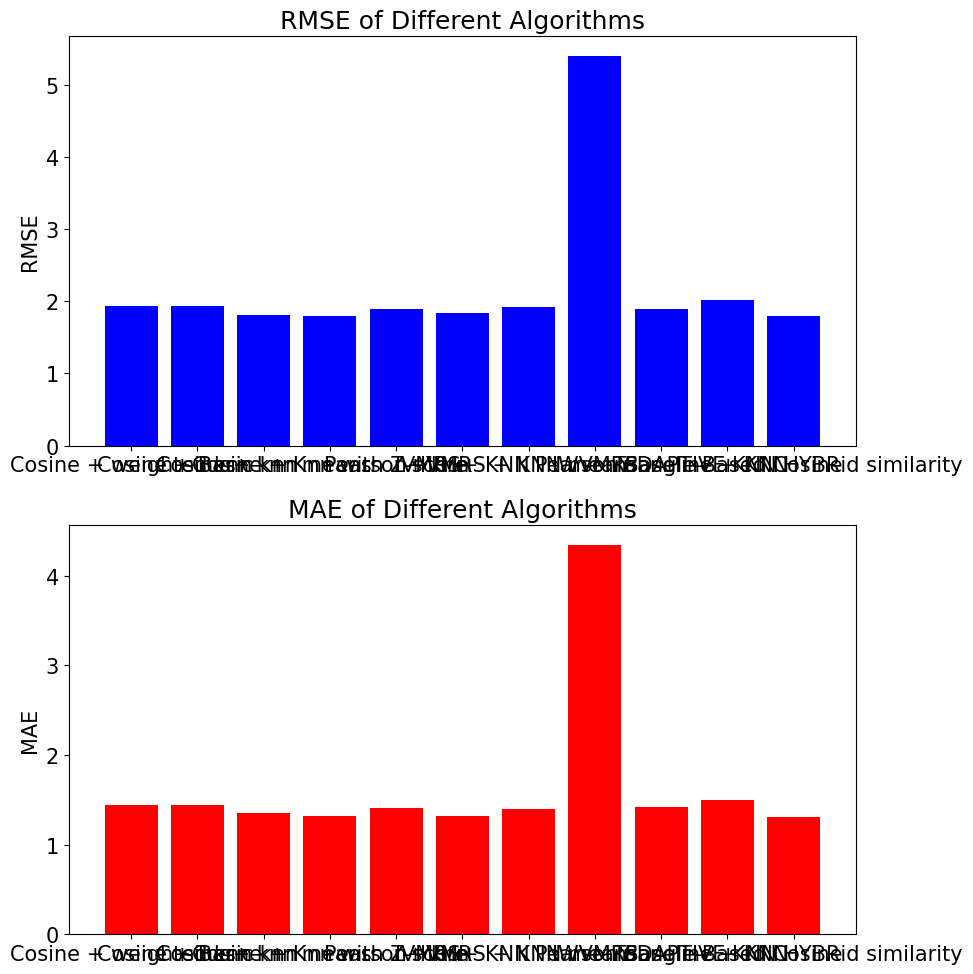

In [ ]:
import matplotlib.pyplot as plt

# Plot bar graphs for RMSE and MAE
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Bar graph for RMSE
ax[0].bar(algorithm_names, rmse_list, color='b')
ax[0].set_title('RMSE of Different Algorithms')
ax[0].set_ylabel('RMSE')

# Bar graph for MAE
ax[1].bar(algorithm_names, mae_list, color='r')
ax[1].set_title('MAE of Different Algorithms')
ax[1].set_ylabel('MAE')

plt.tight_layout()
plt.show()


<ipython-input-77-ca91f39d794a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(algorithm_names, rotation=45, ha='right')
<ipython-input-77-ca91f39d794a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(algorithm_names, rotation=45, ha='right')


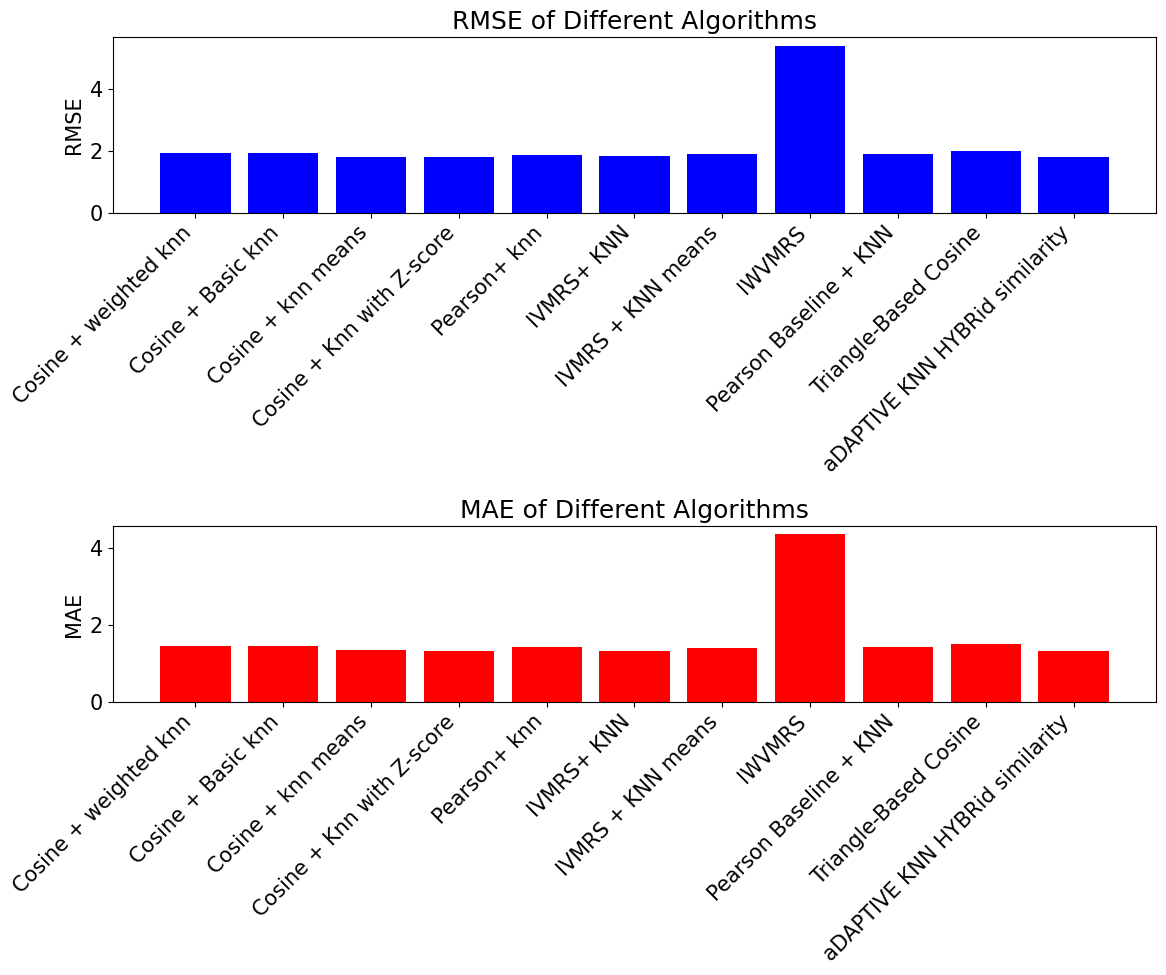

In [ ]:
import matplotlib.pyplot as plt

# Plot bar graphs for RMSE and MAE
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Bar graph for RMSE
ax[0].bar(algorithm_names, rmse_list, color='b')
ax[0].set_title('RMSE of Different Algorithms')
ax[0].set_ylabel('RMSE')
ax[0].set_xticklabels(algorithm_names, rotation=45, ha='right')

# Bar graph for MAE
ax[1].bar(algorithm_names, mae_list, color='r')
ax[1].set_title('MAE of Different Algorithms')
ax[1].set_ylabel('MAE')
ax[1].set_xticklabels(algorithm_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame for better handling
results_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'RMSE': rmse_list,
    'MAE': mae_list
})

# Sort the DataFrame by RMSE and MAE
sorted_by_rmse = results_df.sort_values(by='RMSE').head(5)
sorted_by_mae = results_df.sort_values(by='MAE').head(5)

# Print the results
print("Top 5 Algorithms with Minimum RMSE:")
print(sorted_by_rmse[['Algorithm', 'RMSE']])

print("\nTop 5 Algorithms with Minimum MAE:")
print(sorted_by_mae[['Algorithm', 'MAE']])


Top 5 Algorithms with Minimum RMSE:
                         Algorithm      RMSE
3        Cosine + Knn with Z-score  1.793107
10  aDAPTIVE KNN HYBRid similarity  1.796441
2               Cosine + knn means  1.805711
5                       IVMRS+ KNN  1.832831
4                     Pearson+ knn  1.886695

Top 5 Algorithms with Minimum MAE:
                         Algorithm       MAE
10  aDAPTIVE KNN HYBRid similarity  1.309942
3        Cosine + Knn with Z-score  1.319742
5                       IVMRS+ KNN  1.323511
2               Cosine + knn means  1.351183
6                IVMRS + KNN means  1.402695


In [ ]:
pip install tabulate


In [ ]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame for better handling
results_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'RMSE': rmse_list,
    'MAE': mae_list
})

# Sort the DataFrame by RMSE and MAE
sorted_by_rmse = results_df.sort_values(by='RMSE').head(5)
sorted_by_mae = results_df.sort_values(by='MAE').head(5)

# Print the results using tabulate for better formatting
print("Top 5 Algorithms with Minimum RMSE:")
print(tabulate(sorted_by_rmse[['Algorithm', 'RMSE']], headers='keys', tablefmt='grid'))

print("\nTop 5 Algorithms with Minimum MAE:")
print(tabulate(sorted_by_mae[['Algorithm', 'MAE']], headers='keys', tablefmt='grid'))


Top 5 Algorithms with Minimum RMSE:
+----+--------------------------------+---------+
|    | Algorithm                      |    RMSE |
+====+================================+=========+
|  3 | Cosine + Knn with Z-score      | 1.79311 |
+----+--------------------------------+---------+
| 10 | aDAPTIVE KNN HYBRid similarity | 1.79644 |
+----+--------------------------------+---------+
|  2 | Cosine + knn means             | 1.80571 |
+----+--------------------------------+---------+
|  5 | IVMRS+ KNN                     | 1.83283 |
+----+--------------------------------+---------+
|  4 | Pearson+ knn                   | 1.88669 |
+----+--------------------------------+---------+

Top 5 Algorithms with Minimum MAE:
+----+--------------------------------+---------+
|    | Algorithm                      |     MAE |
+====+================================+=========+
| 10 | aDAPTIVE KNN HYBRid similarity | 1.30994 |
+----+--------------------------------+---------+
|  3 | Cosine + Knn with Z-s

Top 5 Algorithms with Minimum RMSE:
+----+--------------------------------+---------+
|    | Algorithm                      |    RMSE |
+====+================================+=========+
|  3 | Cosine + Knn with Z-score      | 1.79311 |
+----+--------------------------------+---------+
| 10 | aDAPTIVE KNN HYBRid similarity | 1.79644 |
+----+--------------------------------+---------+
|  2 | Cosine + knn means             | 1.80571 |
+----+--------------------------------+---------+
|  5 | IVMRS+ KNN                     | 1.83283 |
+----+--------------------------------+---------+
|  4 | Pearson+ knn                   | 1.88669 |
+----+--------------------------------+---------+

Top 5 Algorithms with Minimum MAE:
+----+--------------------------------+---------+
|    | Algorithm                      |     MAE |
+====+================================+=========+
| 10 | aDAPTIVE KNN HYBRid similarity | 1.30994 |
+----+--------------------------------+---------+
|  3 | Cosine + Knn with Z-s

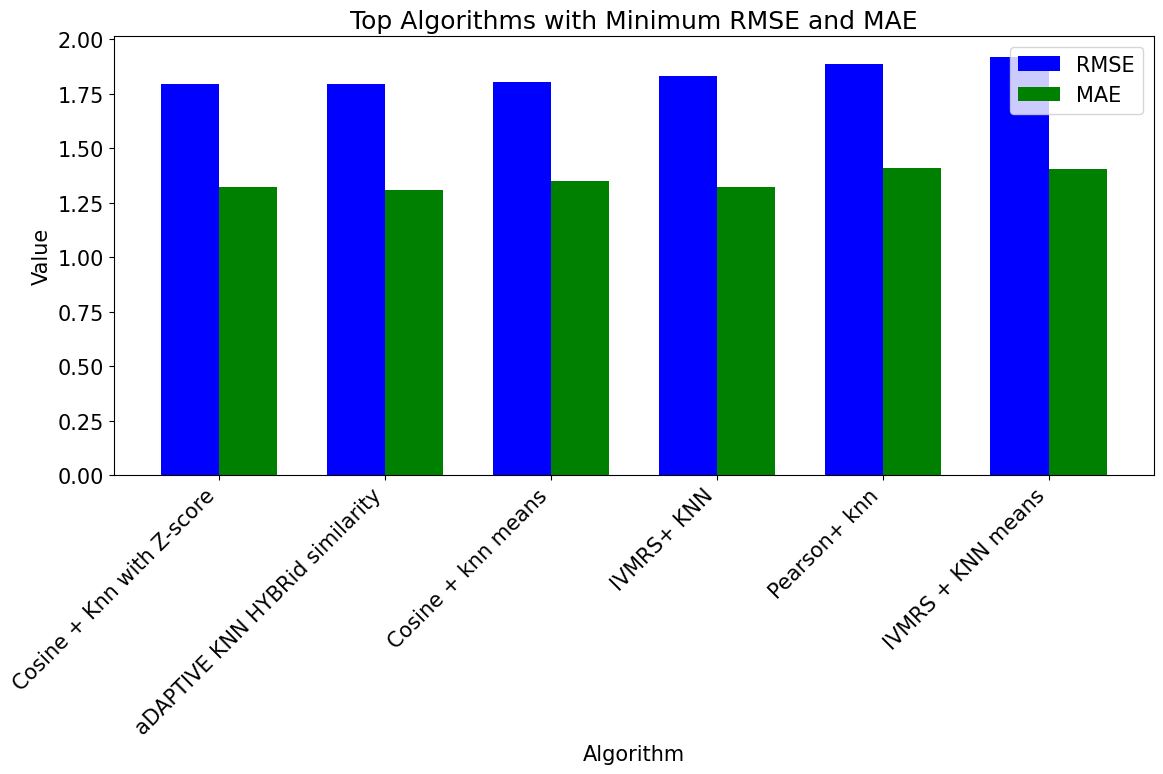

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Create a DataFrame for better handling
results_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'RMSE': rmse_list,
    'MAE': mae_list
})

# Sort the DataFrame by RMSE and MAE
sorted_by_rmse = results_df.sort_values(by='RMSE').head(5)
sorted_by_mae = results_df.sort_values(by='MAE').head(5)

# Print the results using tabulate for better formatting
print("Top 5 Algorithms with Minimum RMSE:")
print(tabulate(sorted_by_rmse[['Algorithm', 'RMSE']], headers='keys', tablefmt='grid'))

print("\nTop 5 Algorithms with Minimum MAE:")
print(tabulate(sorted_by_mae[['Algorithm', 'MAE']], headers='keys', tablefmt='grid'))

# Get unique top 5 algorithms from both RMSE and MAE lists
top_algorithms = pd.concat([sorted_by_rmse[['Algorithm']], sorted_by_mae[['Algorithm']]]).drop_duplicates().reset_index(drop=True)

# Merge the sorted RMSE and MAE dataframes with the top algorithms
top_results = top_algorithms.merge(results_df, on='Algorithm', how='left')

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = range(len(top_results))

# Bars for RMSE
rmse_bars = ax.bar([i - bar_width/2 for i in index], top_results['RMSE'], bar_width, label='RMSE', color='b')

# Bars for MAE
mae_bars = ax.bar([i + bar_width/2 for i in index], top_results['MAE'], bar_width, label='MAE', color='g')

# Add titles and labels
ax.set_title('Top Algorithms with Minimum RMSE and MAE')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Value')
ax.set_xticks(index)
ax.set_xticklabels(top_results['Algorithm'], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame for better handling
results_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'RMSE': rmse_list,
    'MAE': mae_list
})

# Sort the DataFrame by RMSE and MAE
sorted_by_rmse = results_df.sort_values(by='RMSE').head(5)
sorted_by_mae = results_df.sort_values(by='MAE').head(5)

# Print the results using tabulate with default formatting
print("\033[1m\033[4mTop 5 Algorithms with Minimum RMSE:\033[0m")
print(tabulate(sorted_by_rmse[['Algorithm', 'RMSE']], headers='keys', tablefmt='pipe', stralign='center', numalign='center'))

print("\n\033[1m\033[4mTop 5 Algorithms with Minimum MAE:\033[0m")
print(tabulate(sorted_by_mae[['Algorithm', 'MAE']], headers='keys', tablefmt='pipe', stralign='center', numalign='center'))

Top 5 Algorithms with Minimum RMSE:
|    |           Algorithm            |  RMSE   |
|:--:|:------------------------------:|:-------:|
| 3  |   Cosine + Knn with Z-score    | 1.79311 |
| 10 | aDAPTIVE KNN HYBRid similarity | 1.79644 |
| 2  |       Cosine + knn means       | 1.80571 |
| 5  |           IVMRS+ KNN           | 1.83283 |
| 4  |          Pearson+ knn          | 1.88669 |

Top 5 Algorithms with Minimum MAE:
|    |           Algorithm            |   MAE   |
|:--:|:------------------------------:|:-------:|
| 10 | aDAPTIVE KNN HYBRid similarity | 1.30994 |
| 3  |   Cosine + Knn with Z-score    | 1.31974 |
| 5  |           IVMRS+ KNN           | 1.32351 |
| 2  |       Cosine + knn means       | 1.35118 |
| 6  |       IVMRS + KNN means        | 1.4027  |


<ipython-input-82-bdf468db5e76>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(sorted_algorithm_names_rmse, rotation=45, ha='right')
<ipython-input-82-bdf468db5e76>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(sorted_algorithm_names_mae, rotation=45, ha='right')


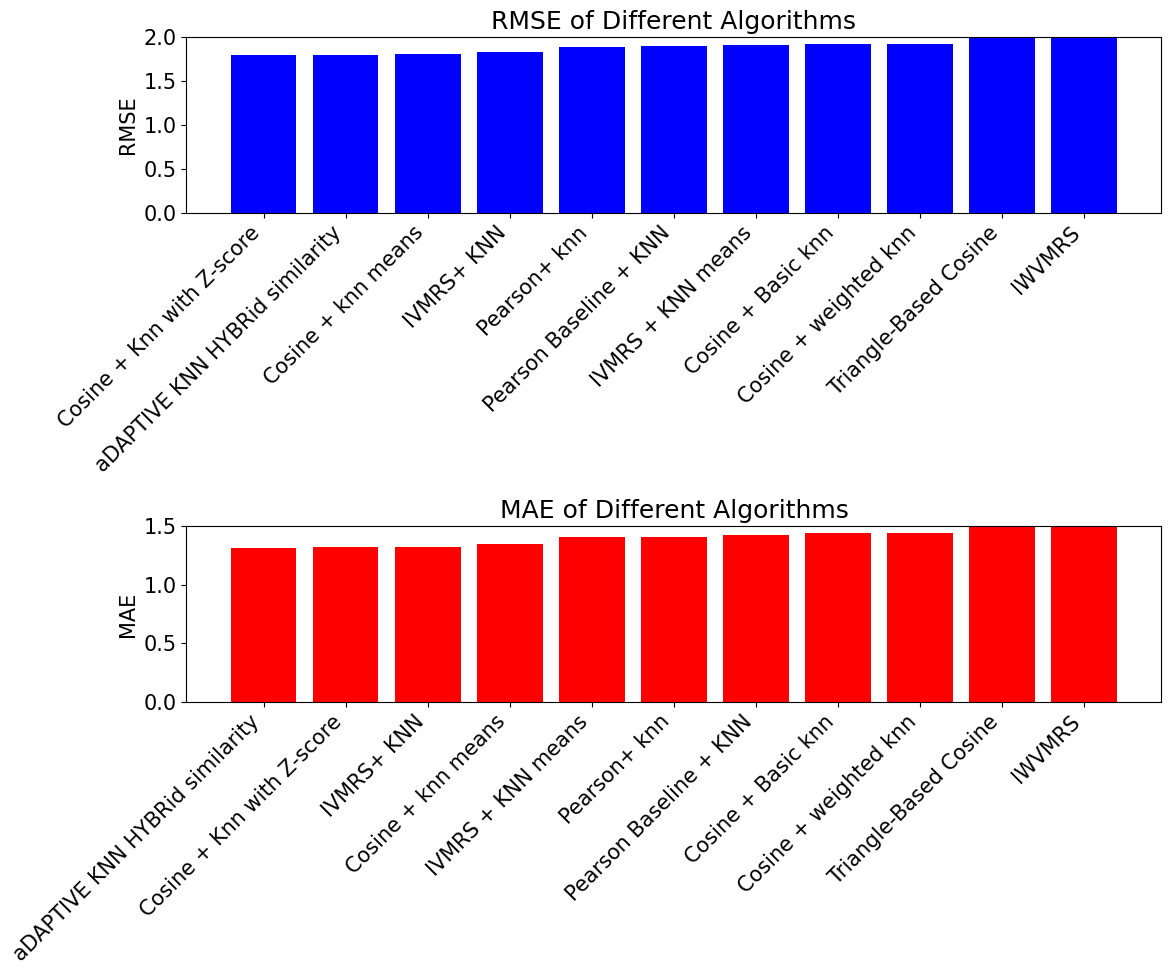

  Metric                       Algorithm     Value
0   RMSE       Cosine + Knn with Z-score  1.793107
1    MAE  aDAPTIVE KNN HYBRid similarity  1.309942


In [ ]:
import matplotlib.pyplot as plt

# Assuming algorithm_names, rmse_list, and mae_list are defined


# Create duplicates of the original lists
filtered_algorithm_names = algorithm_names.copy()
filtered_rmse_list = rmse_list.copy()
filtered_mae_list = mae_list.copy()

# Remove 'baseline', 'iwvmrs', 'ivwmrs', and 'SVD' from the lists
indexes_to_remove = [i for i, name in enumerate(filtered_algorithm_names) if name.lower() in ['baseline', 'IWVMRS ', 'SVD']]
for index in sorted(indexes_to_remove, reverse=True):
    del filtered_algorithm_names[index]
    del filtered_rmse_list[index]
    del filtered_mae_list[index]

# Sort the filtered lists by RMSE
sorted_rmse_indexes = sorted(range(len(filtered_rmse_list)), key=lambda k: filtered_rmse_list[k])
sorted_algorithm_names_rmse = [filtered_algorithm_names[i] for i in sorted_rmse_indexes]
sorted_rmse_list = [filtered_rmse_list[i] for i in sorted_rmse_indexes]

# Sort the filtered lists by MAE
sorted_mae_indexes = sorted(range(len(filtered_mae_list)), key=lambda k: filtered_mae_list[k])
sorted_algorithm_names_mae = [filtered_algorithm_names[i] for i in sorted_mae_indexes]
sorted_mae_list = [filtered_mae_list[i] for i in sorted_mae_indexes]

# Plot bar graphs for RMSE and MAE
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Bar graph for RMSE
ax[0].bar(sorted_algorithm_names_rmse, sorted_rmse_list, color='b')
ax[0].set_title('RMSE of Different Algorithms')
ax[0].set_ylabel('RMSE')
ax[0].set_ylim(0, 2)  # Adjust y-axis limits for better visibility
ax[0].set_xticklabels(sorted_algorithm_names_rmse, rotation=45, ha='right')

# Bar graph for MAE
ax[1].bar(sorted_algorithm_names_mae, sorted_mae_list, color='r')
ax[1].set_title('MAE of Different Algorithms')
ax[1].set_ylabel('MAE')
ax[1].set_ylim(0, 1.5)  # Adjust y-axis limits for better visibility
ax[1].set_xticklabels(sorted_algorithm_names_mae, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Find the algorithm with the minimum RMSE and MAE
min_rmse_index = filtered_rmse_list.index(min(filtered_rmse_list))
min_mae_index = filtered_mae_list.index(min(filtered_mae_list))

min_rmse_algorithm = filtered_algorithm_names[min_rmse_index]
min_mae_algorithm = filtered_algorithm_names[min_mae_index]

# Create a table for the minimum RMSE and MAE valued algorithms
import pandas as pd

data = {
    'Metric': ['RMSE', 'MAE'],
    'Algorithm': [min_rmse_algorithm, min_mae_algorithm],
    'Value': [filtered_rmse_list[min_rmse_index], filtered_mae_list[min_mae_index]]
}

df = pd.DataFrame(data)
print(df)

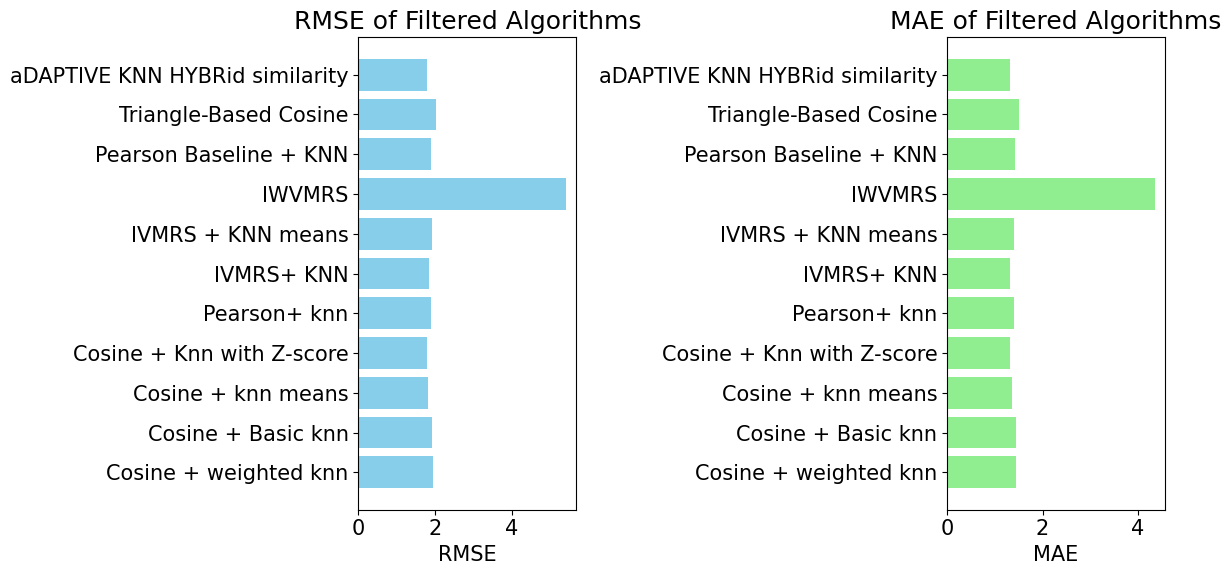

Algorithm: Cosine + weighted knn
  RMSE: 1.929358365635282
  MAE: 1.4433384673700846

Algorithm: Cosine + Basic knn
  RMSE: 1.9272835804651465
  MAE: 1.4416930415709517

Algorithm: Cosine + knn means
  RMSE: 1.8057112061612859
  MAE: 1.3511829235259998

Algorithm: Cosine + Knn with Z-score
  RMSE: 1.7931068422386622
  MAE: 1.3197417003731944

Algorithm: Pearson+ knn
  RMSE: 1.8866949460862268
  MAE: 1.4096878043496655

Algorithm: IVMRS+ KNN
  RMSE: 1.832831401282739
  MAE: 1.3235105599209924

Algorithm: IVMRS + KNN means
  RMSE: 1.9173234964138344
  MAE: 1.4026954170133141

Algorithm: IWVMRS
  RMSE: 5.3994615728147055
  MAE: 4.347273338517088

Algorithm: Pearson Baseline + KNN
  RMSE: 1.8963043254048226
  MAE: 1.4226813211779623

Algorithm: Triangle-Based Cosine
  RMSE: 2.014260101983794
  MAE: 1.496880713570078

Algorithm: aDAPTIVE KNN HYBRid similarity
  RMSE: 1.7964408348899983
  MAE: 1.309942460031934



In [ ]:

# Copy the original lists
filtered_algorithm_names = algorithm_names.copy()
filtered_rmse_list = rmse_list.copy()
filtered_mae_list = mae_list.copy()

# Remove 'baseline', 'IWVMRS', 'SVD' from the lists
indexes_to_remove = [i for i, name in enumerate(filtered_algorithm_names) if name.lower() in ['baseline', 'iwvmrs with vmd', 'svd']]
for index in sorted(indexes_to_remove, reverse=True):
    del filtered_algorithm_names[index]
    del filtered_rmse_list[index]
    del filtered_mae_list[index]

# Plotting the filtered algorithms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(filtered_algorithm_names, filtered_rmse_list, color='skyblue')
plt.xlabel('RMSE')
plt.title('RMSE of Filtered Algorithms')

plt.subplot(1, 2, 2)
plt.barh(filtered_algorithm_names, filtered_mae_list, color='lightgreen')
plt.xlabel('MAE')
plt.title('MAE of Filtered Algorithms')

plt.tight_layout()
plt.show()
for name, rmse, mae in zip(filtered_algorithm_names, filtered_rmse_list, filtered_mae_list):
    print(f"Algorithm: {name}\n  RMSE: {rmse}\n  MAE: {mae}\n")


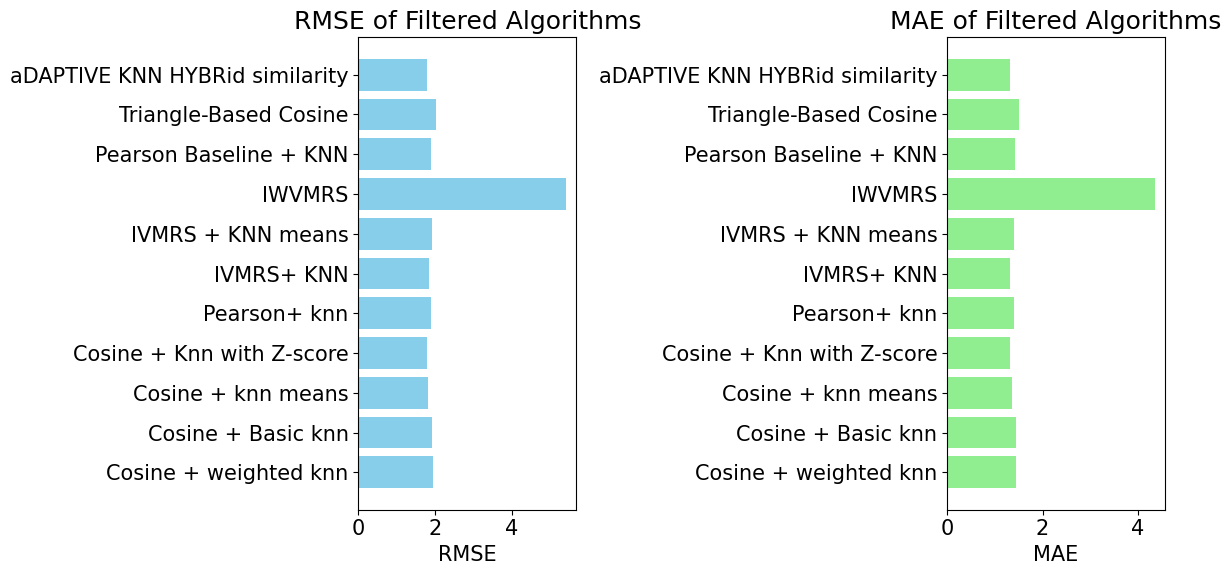

Algorithm: Cosine + weighted knn
  RMSE: 1.929358365635282
  MAE: 1.4433384673700846

Algorithm: Cosine + Basic knn
  RMSE: 1.9272835804651465
  MAE: 1.4416930415709517

Algorithm: Cosine + knn means
  RMSE: 1.8057112061612859
  MAE: 1.3511829235259998

Algorithm: Cosine + Knn with Z-score
  RMSE: 1.7931068422386622
  MAE: 1.3197417003731944

Algorithm: Pearson+ knn
  RMSE: 1.8866949460862268
  MAE: 1.4096878043496655

Algorithm: IVMRS+ KNN
  RMSE: 1.832831401282739
  MAE: 1.3235105599209924

Algorithm: IVMRS + KNN means
  RMSE: 1.9173234964138344
  MAE: 1.4026954170133141

Algorithm: IWVMRS
  RMSE: 5.3994615728147055
  MAE: 4.347273338517088

Algorithm: Pearson Baseline + KNN
  RMSE: 1.8963043254048226
  MAE: 1.4226813211779623

Algorithm: Triangle-Based Cosine
  RMSE: 2.014260101983794
  MAE: 1.496880713570078

Algorithm: aDAPTIVE KNN HYBRid similarity
  RMSE: 1.7964408348899983
  MAE: 1.309942460031934



In [ ]:

# Copy the original lists
filtered_algorithm_names = algorithm_names.copy()
filtered_rmse_list = rmse_list.copy()
filtered_mae_list = mae_list.copy()

# Remove 'baseline', 'IWVMRS', 'SVD' from the lists


# Plotting the filtered algorithms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(filtered_algorithm_names, filtered_rmse_list, color='skyblue')
plt.xlabel('RMSE')
plt.title('RMSE of Filtered Algorithms')

plt.subplot(1, 2, 2)
plt.barh(filtered_algorithm_names, filtered_mae_list, color='lightgreen')
plt.xlabel('MAE')
plt.title('MAE of Filtered Algorithms')

plt.tight_layout()
plt.show()
for name, rmse, mae in zip(filtered_algorithm_names, filtered_rmse_list, filtered_mae_list):
    print(f"Algorithm: {name}\n  RMSE: {rmse}\n  MAE: {mae}\n")

Count of filtered algorithms: 11

Algorithm: Cosine + weighted knn
  RMSE: 1.929358365635282
  MAE: 1.4433384673700846

Algorithm: Cosine + Basic knn
  RMSE: 1.9272835804651465
  MAE: 1.4416930415709517

Algorithm: Cosine + knn means
  RMSE: 1.8057112061612859
  MAE: 1.3511829235259998

Algorithm: Cosine + Knn with Z-score
  RMSE: 1.7931068422386622
  MAE: 1.3197417003731944

Algorithm: Pearson+ knn
  RMSE: 1.8866949460862268
  MAE: 1.4096878043496655

Algorithm: IVMRS+ KNN
  RMSE: 1.832831401282739
  MAE: 1.3235105599209924

Algorithm: IVMRS + KNN means
  RMSE: 1.9173234964138344
  MAE: 1.4026954170133141

Algorithm: IWVMRS
  RMSE: 5.3994615728147055
  MAE: 4.347273338517088

Algorithm: Pearson Baseline + KNN
  RMSE: 1.8963043254048226
  MAE: 1.4226813211779623

Algorithm: Triangle-Based Cosine
  RMSE: 2.014260101983794
  MAE: 1.496880713570078

Algorithm: aDAPTIVE KNN HYBRid similarity
  RMSE: 1.7964408348899983
  MAE: 1.309942460031934



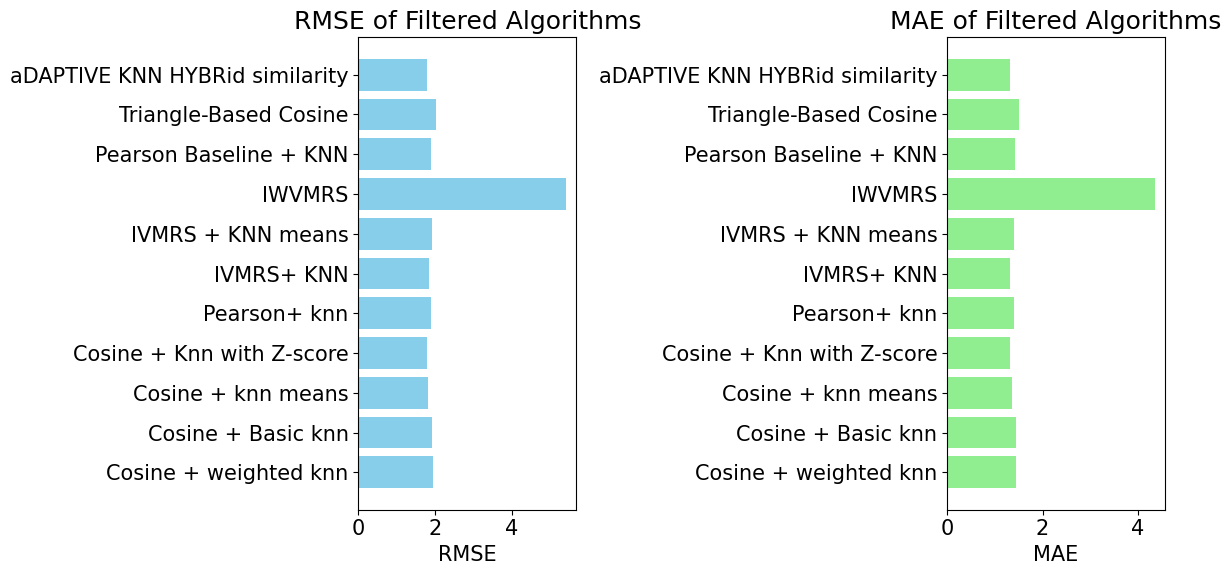

In [ ]:
import matplotlib.pyplot as plt

# Original data

# Copy the original lists
filtered_algorithm_names = algorithm_names.copy()
filtered_rmse_list = rmse_list.copy()
filtered_mae_list = mae_list.copy()



# Count the filtered algorithms
filtered_count = len(filtered_algorithm_names)

# Print the count of filtered algorithms
print(f"Count of filtered algorithms: {filtered_count}\n")

# Print the RMSE and MAE of each filtered algorithm
for name, rmse, mae in zip(filtered_algorithm_names, filtered_rmse_list, filtered_mae_list):
    print(f"Algorithm: {name}\n  RMSE: {rmse}\n  MAE: {mae}\n")

# Plotting the filtered algorithms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(filtered_algorithm_names, filtered_rmse_list, color='skyblue')
plt.xlabel('RMSE')
plt.title('RMSE of Filtered Algorithms')

plt.subplot(1, 2, 2)
plt.barh(filtered_algorithm_names, filtered_mae_list, color='lightgreen')
plt.xlabel('MAE')
plt.title('MAE of Filtered Algorithms')

plt.tight_layout()
plt.show()


Algorithms with higher RMSE than Adaptive KNN Hybrid:
Cosine + weighted knn
Cosine + Basic knn
Cosine + knn means
Pearson+ knn
IVMRS+ KNN
IVMRS + KNN means
IWVMRS
Pearson Baseline + KNN
Triangle-Based Cosine
aDAPTIVE KNN HYBRid similarity

Algorithms with higher MAE than Adaptive KNN Hybrid:
Cosine + weighted knn
Cosine + Basic knn
Cosine + knn means
Cosine + Knn with Z-score
Pearson+ knn
IVMRS+ KNN
IVMRS + KNN means
IWVMRS
Pearson Baseline + KNN
Triangle-Based Cosine
aDAPTIVE KNN HYBRid similarity


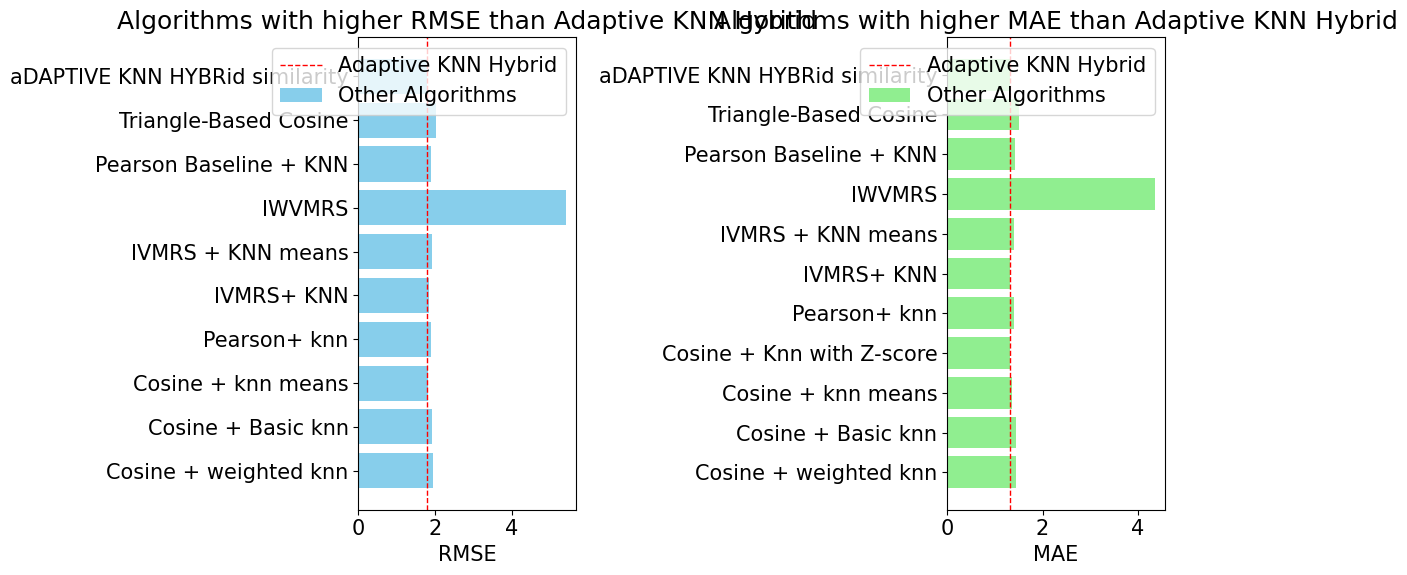

In [ ]:
import matplotlib.pyplot as plt


adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid
better_rmse_algos = [name for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse]
better_mae_algos = [name for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae]

# Print algorithms with higher RMSE and MAE
print("Algorithms with higher RMSE than Adaptive KNN Hybrid:")
for name in better_rmse_algos:
    print(name)

print("\nAlgorithms with higher MAE than Adaptive KNN Hybrid:")
for name in better_mae_algos:
    print(name)

# Prepare data for plotting
better_rmse_values = [rmse for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse]
better_mae_values = [mae for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae]

# Plotting the comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(better_rmse_algos, better_rmse_values, color='skyblue', label='Other Algorithms')
plt.axvline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label='Adaptive KNN Hybrid')
plt.xlabel('RMSE')
plt.title('Algorithms with higher RMSE than Adaptive KNN Hybrid')
plt.legend()

plt.subplot(1, 2, 2)
plt.barh(better_mae_algos, better_mae_values, color='lightgreen', label='Other Algorithms')
plt.axvline(adaptive_knn_mae, color='red', linestyle='dashed', linewidth=1, label='Adaptive KNN Hybrid')
plt.xlabel('MAE')
plt.title('Algorithms with higher MAE than Adaptive KNN Hybrid')
plt.legend()

plt.tight_layout()
plt.show()


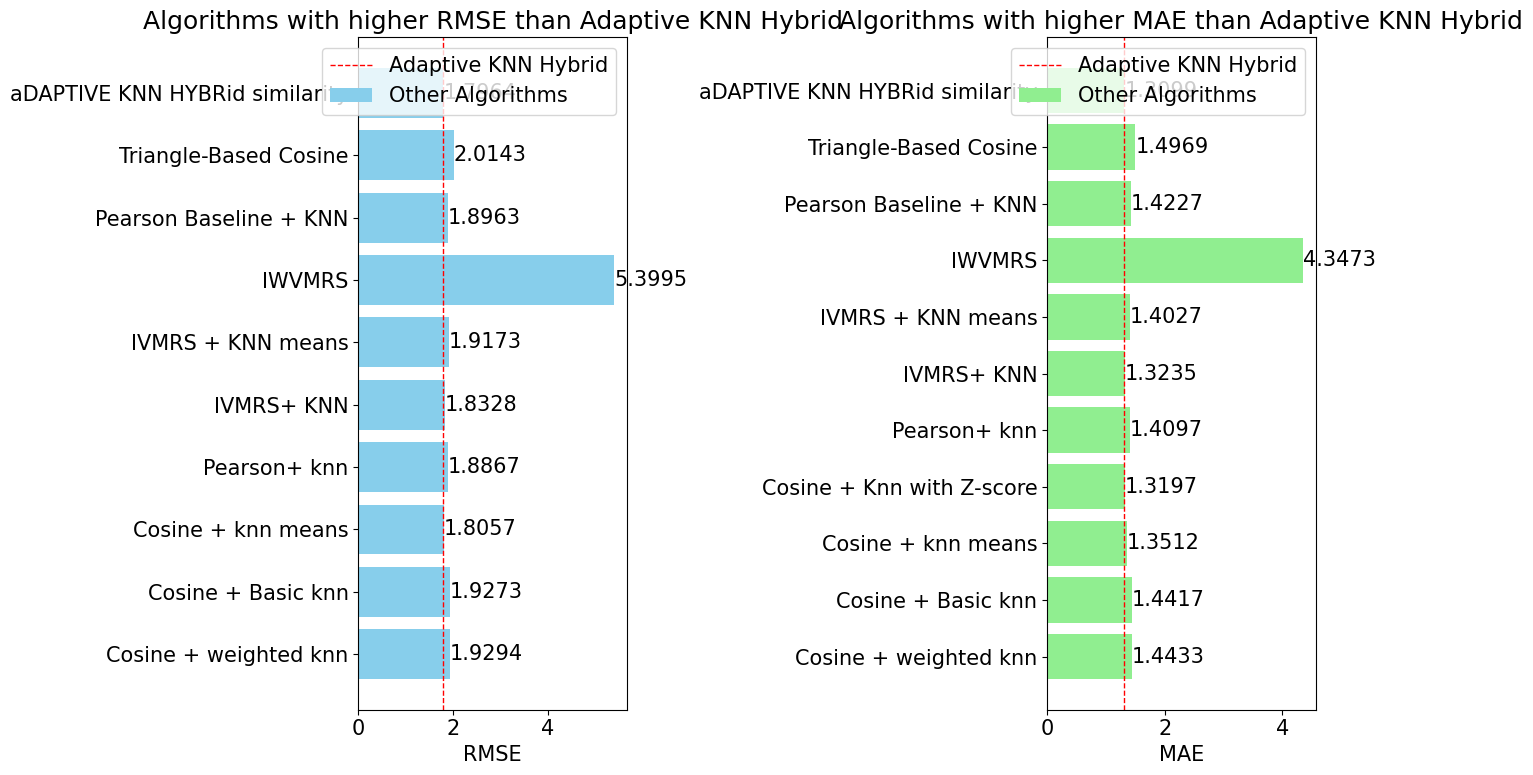

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid
better_rmse_algos = [name for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse]
better_mae_algos = [name for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae]

# Prepare data for plotting
better_rmse_values = [rmse for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse]
better_mae_values = [mae for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae]

# Plotting the comparison
plt.figure(figsize=(14, 8))

# RMSE Plot
plt.subplot(1, 2, 1)
bars_rmse = plt.barh(better_rmse_algos, better_rmse_values, color='skyblue', label='Other Algorithms')
plt.axvline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.xlabel('RMSE')
plt.title('Algorithms with higher RMSE than Adaptive KNN Hybrid')
plt.legend()

# Labeling bars with RMSE values
for bar, value in zip(bars_rmse, better_rmse_values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.4f}',
             va='center', ha='left', color='black')

# MAE Plot
plt.subplot(1, 2, 2)
bars_mae = plt.barh(better_mae_algos, better_mae_values, color='lightgreen', label='Other Algorithms')
plt.axvline(adaptive_knn_mae, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.xlabel('MAE')
plt.title('Algorithms with higher MAE than Adaptive KNN Hybrid')
plt.legend()

# Labeling bars with MAE values
for bar, value in zip(bars_mae, better_mae_values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.4f}',
             va='center', ha='left', color='black')

plt.tight_layout()
plt.show()


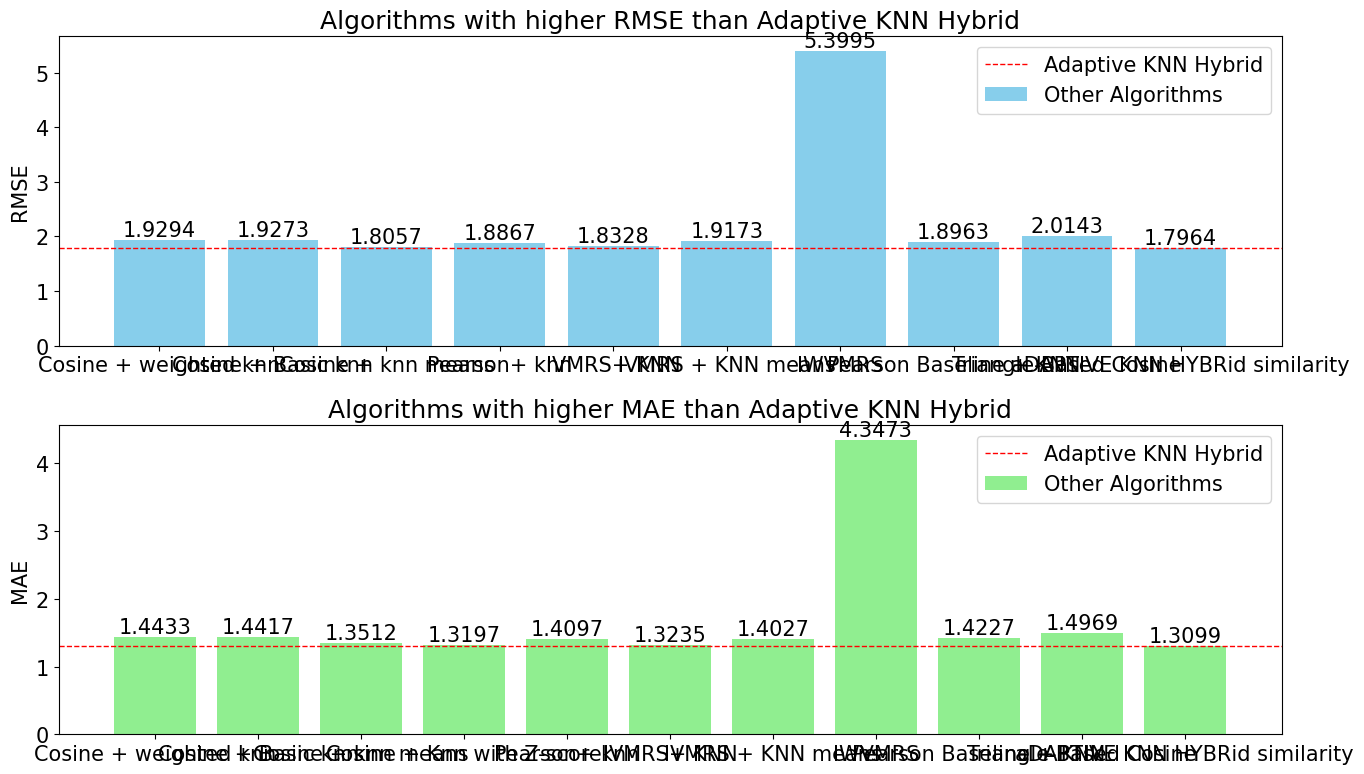

In [ ]:
import matplotlib.pyplot as plt



adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid, excluding 'Baseline' and 'IWVMRS with VMD'
excluded_algorithms = ['baseline', 'IVWMRS ']
better_rmse_algos = [name for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse and name not in excluded_algorithms]
better_mae_algos = [name for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae and name not in excluded_algorithms]

# Prepare data for plotting
better_rmse_values = [rmse for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse and name not in excluded_algorithms]
better_mae_values = [mae for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae and name not in excluded_algorithms]

# Plotting the comparison
plt.figure(figsize=(14, 8))

# RMSE Plot
plt.subplot(2, 1, 1)
bars_rmse = plt.bar(better_rmse_algos, better_rmse_values, color='skyblue', label='Other Algorithms')
plt.axhline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.ylabel('RMSE')
plt.title('Algorithms with higher RMSE than Adaptive KNN Hybrid')
plt.legend()

# Labeling bars with RMSE values
for bar, value in zip(bars_rmse, better_rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.4f}',
             va='bottom', ha='center', color='black')

# MAE Plot
plt.subplot(2, 1, 2)
bars_mae = plt.bar(better_mae_algos, better_mae_values, color='lightgreen', label='Other Algorithms')
plt.axhline(adaptive_knn_mae, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.ylabel('MAE')
plt.title('Algorithms with higher MAE than Adaptive KNN Hybrid')
plt.legend()

# Labeling bars with MAE values
for bar, value in zip(bars_mae, better_mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.4f}',
             va='bottom', ha='center', color='black')

plt.tight_layout()
plt.show()


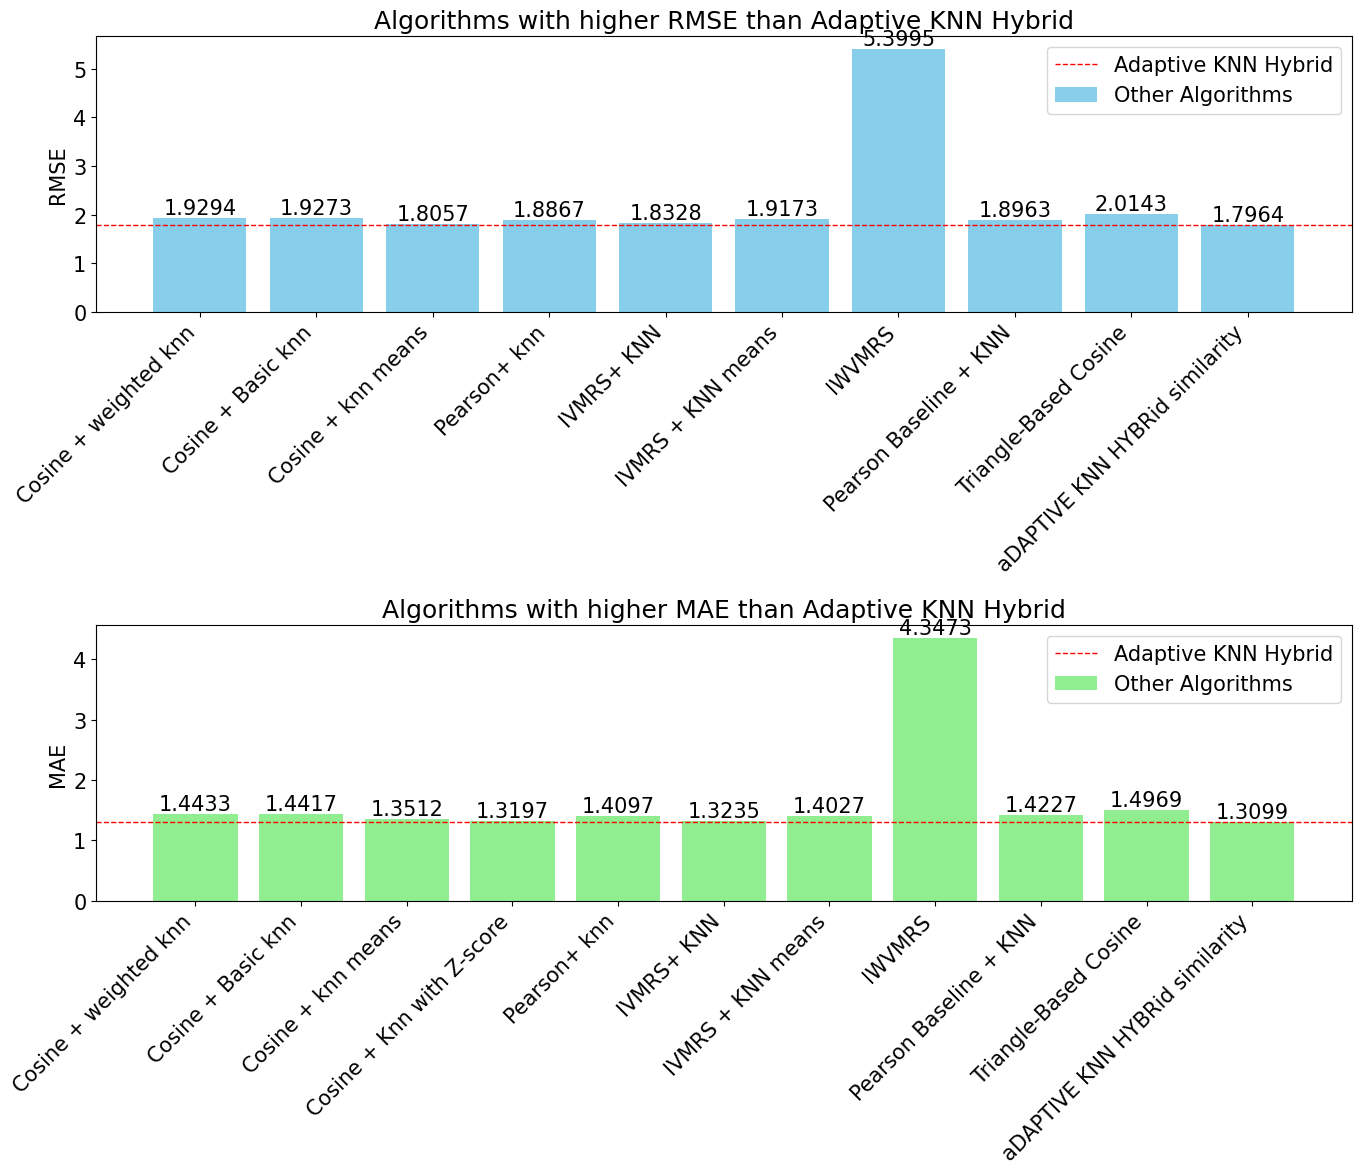

In [ ]:
import matplotlib.pyplot as plt

# Original data


adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid, excluding 'Baseline' and 'IWVMRS with VMD'
excluded_algorithms = ['baseline', 'IVWMRS ']
better_rmse_algos = [name for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse and name not in excluded_algorithms]
better_mae_algos = [name for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae and name not in excluded_algorithms]

# Prepare data for plotting
better_rmse_values = [rmse for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse and name not in excluded_algorithms]
better_mae_values = [mae for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae and name not in excluded_algorithms]

# Plotting the comparison
plt.figure(figsize=(14, 12))

# RMSE Plot
plt.subplot(2, 1, 1)
bars_rmse = plt.bar(better_rmse_algos, better_rmse_values, color='skyblue', label='Other Algorithms')
plt.axhline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.ylabel('RMSE')
plt.title('Algorithms with higher RMSE than Adaptive KNN Hybrid')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Labeling bars with RMSE values
for bar, value in zip(bars_rmse, better_rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.4f}',
             va='bottom', ha='center', color='black')

# MAE Plot
plt.subplot(2, 1, 2)
bars_mae = plt.bar(better_mae_algos, better_mae_values, color='lightgreen', label='Other Algorithms')
plt.axhline(adaptive_knn_mae, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.ylabel('MAE')
plt.title('Algorithms with higher MAE than Adaptive KNN Hybrid')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Labeling bars with MAE values
for bar, value in zip(bars_mae, better_mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.4f}',
             va='bottom', ha='center', color='black')

plt.tight_layout()
plt.show()


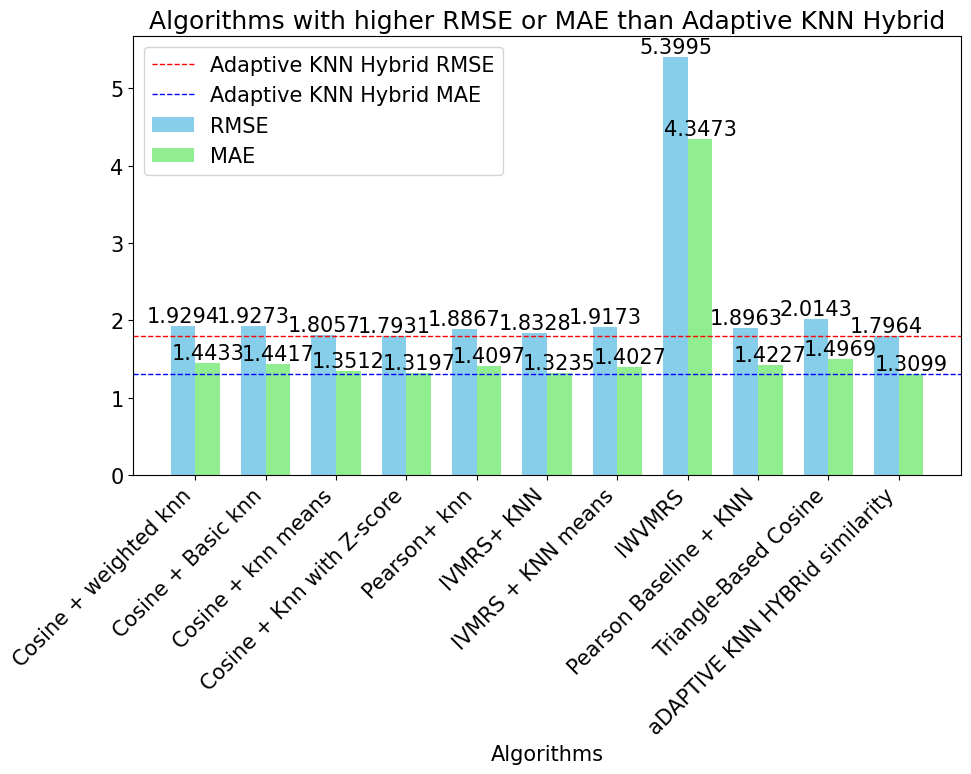

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original data


adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid, excluding 'Baseline' and 'IWVMRS with VMD'
excluded_algorithms = ['baseline', 'IVWMRS ']
better_algos = [name for name in algorithm_names if name not in excluded_algorithms and (
                rmse_list[algorithm_names.index(name)] > adaptive_knn_rmse or
                mae_list[algorithm_names.index(name)] > adaptive_knn_mae)]

# Prepare data for plotting
better_rmse_values = [rmse_list[algorithm_names.index(name)] for name in better_algos]
better_mae_values = [mae_list[algorithm_names.index(name)] for name in better_algos]

# Create a grouped bar plot
x = np.arange(len(better_algos))
width = 0.35

plt.figure(figsize=(10, 8))

bars1 = plt.bar(x - width/2, better_rmse_values, width, label='RMSE', color='skyblue')
bars2 = plt.bar(x + width/2, better_mae_values, width, label='MAE', color='lightgreen')

plt.axhline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} RMSE')
plt.axhline(adaptive_knn_mae, color='blue', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} MAE')

plt.xlabel('Algorithms')
plt.title('Algorithms with higher RMSE or MAE than Adaptive KNN Hybrid')
plt.xticks(x, better_algos, rotation=45, ha='right')
plt.legend()

# Labeling bars with RMSE and MAE values
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

plt.tight_layout()
plt.show()


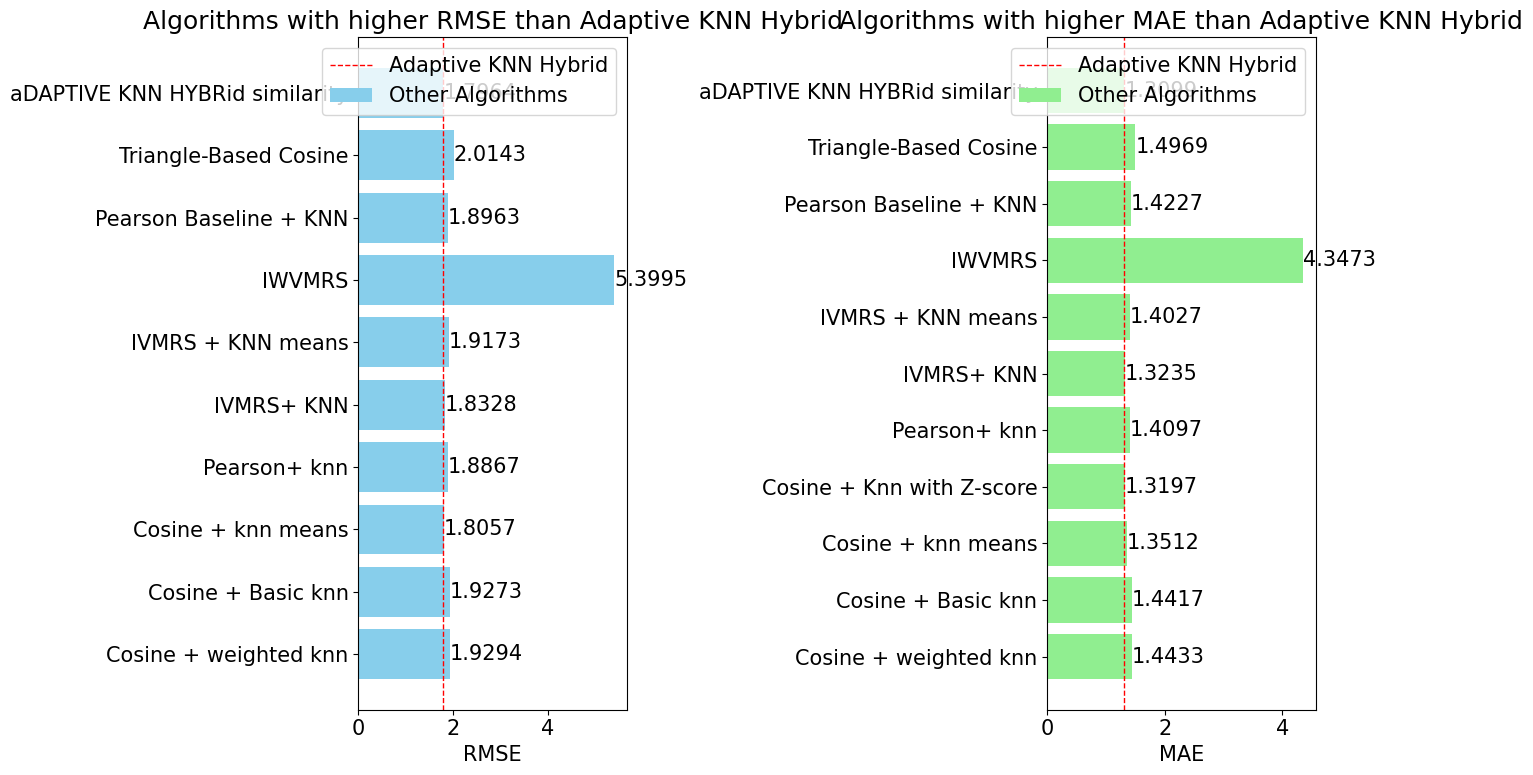

In [ ]:
import matplotlib.pyplot as plt

# Original data


adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid
better_rmse_algos = [name for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse]
better_mae_algos = [name for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae]

# Prepare data for plotting
better_rmse_values = [rmse for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse]
better_mae_values = [mae for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae]

# Plotting the comparison
plt.figure(figsize=(14, 8))

# RMSE Plot
plt.subplot(1, 2, 1)
bars_rmse = plt.barh(better_rmse_algos, better_rmse_values, color='skyblue', label='Other Algorithms')
plt.axvline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.xlabel('RMSE')
plt.title('Algorithms with higher RMSE than Adaptive KNN Hybrid')
plt.legend()

# Labeling bars with RMSE values
for bar, value in zip(bars_rmse, better_rmse_values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.4f}',
             va='center', ha='left', color='black')

# MAE Plot
plt.subplot(1, 2, 2)
bars_mae = plt.barh(better_mae_algos, better_mae_values, color='lightgreen', label='Other Algorithms')
plt.axvline(adaptive_knn_mae, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.xlabel('MAE')
plt.title('Algorithms with higher MAE than Adaptive KNN Hybrid')
plt.legend()

# Labeling bars with MAE values
for bar, value in zip(bars_mae, better_mae_values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.4f}',
             va='center', ha='left', color='black')

plt.tight_layout()
plt.show()


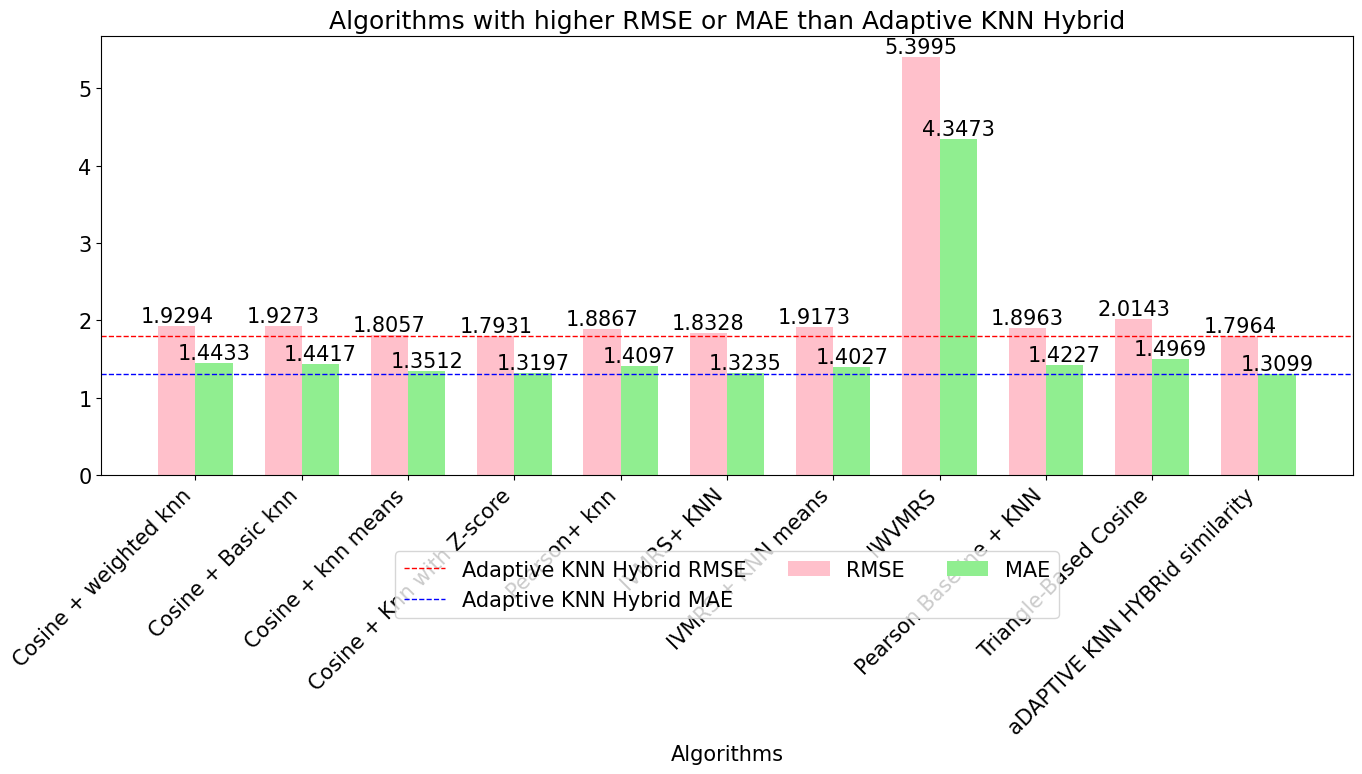

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original data


adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid, excluding 'Baseline' and 'IWVMRS with VMD'
excluded_algorithms = ['baseline', 'IVWMRS ']
better_algos = [name for name in algorithm_names if name not in excluded_algorithms and (
                rmse_list[algorithm_names.index(name)] > adaptive_knn_rmse or
                mae_list[algorithm_names.index(name)] > adaptive_knn_mae)]

# Prepare data for plotting
better_rmse_values = [rmse_list[algorithm_names.index(name)] for name in better_algos]
better_mae_values = [mae_list[algorithm_names.index(name)] for name in better_algos]

# Create a grouped bar plot
x = np.arange(len(better_algos))
width = 0.35

plt.figure(figsize=(14, 8))

bars1 = plt.bar(x - width/2, better_rmse_values, width, label='RMSE', color='pink')
bars2 = plt.bar(x + width/2, better_mae_values, width, label='MAE', color='lightgreen')

plt.axhline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} RMSE')
plt.axhline(adaptive_knn_mae, color='blue', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} MAE')

plt.xlabel('Algorithms')
plt.title('Algorithms with higher RMSE or MAE than Adaptive KNN Hybrid')
plt.xticks(x, better_algos, rotation=45, ha='right')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Labeling bars with RMSE and MAE values
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

plt.tight_layout()
plt.show()


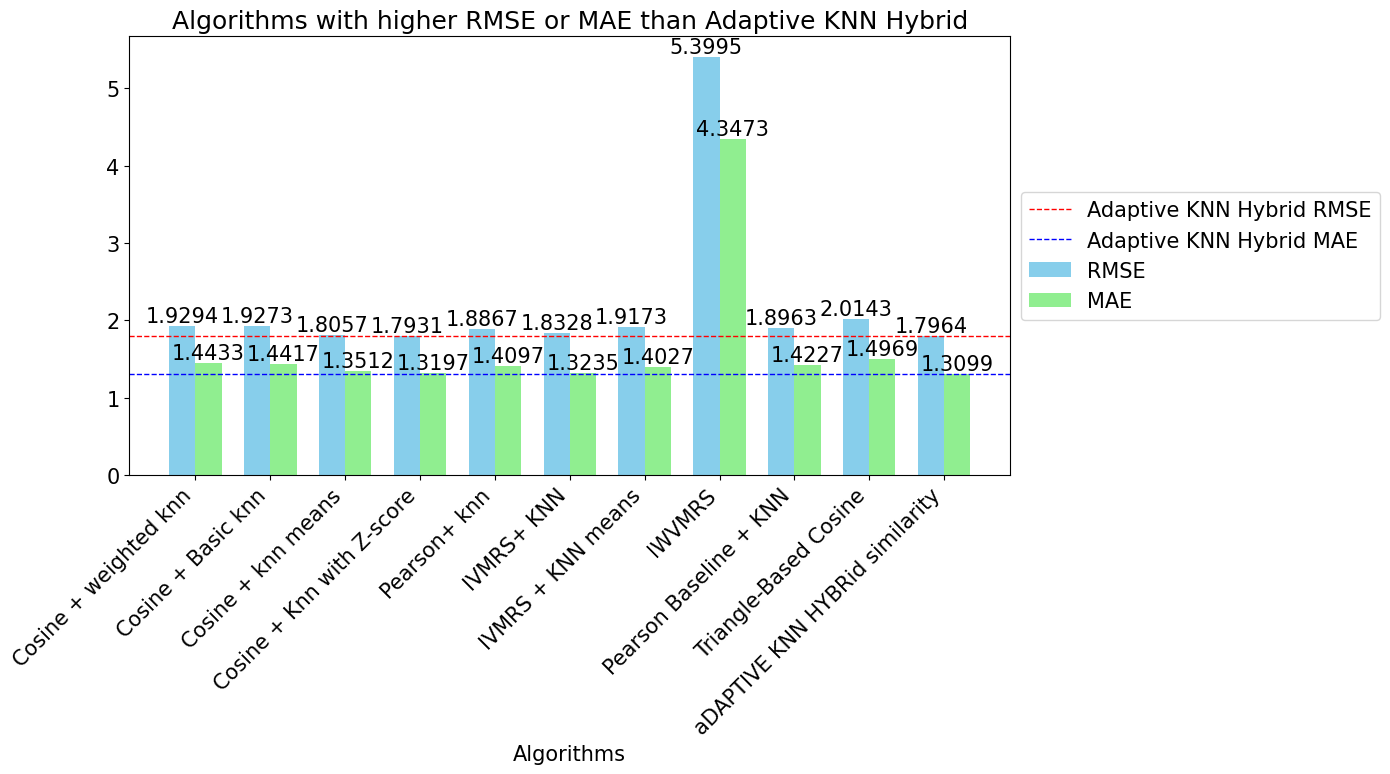

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original data


adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid, excluding 'Baseline' and 'IWVMRS with VMD'
excluded_algorithms = ['baseline', 'IVWMRS ']
better_algos = [name for name in algorithm_names if name not in excluded_algorithms and (
                rmse_list[algorithm_names.index(name)] > adaptive_knn_rmse or
                mae_list[algorithm_names.index(name)] > adaptive_knn_mae)]

# Prepare data for plotting
better_rmse_values = [rmse_list[algorithm_names.index(name)] for name in better_algos]
better_mae_values = [mae_list[algorithm_names.index(name)] for name in better_algos]

# Create a grouped bar plot
x = np.arange(len(better_algos))
width = 0.35

plt.figure(figsize=(14, 8))

bars1 = plt.bar(x - width/2, better_rmse_values, width, label='RMSE', color='skyblue')
bars2 = plt.bar(x + width/2, better_mae_values, width, label='MAE', color='lightgreen')

plt.axhline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} RMSE')
plt.axhline(adaptive_knn_mae, color='blue', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} MAE')

plt.xlabel('Algorithms')
plt.title('Algorithms with higher RMSE or MAE than Adaptive KNN Hybrid')
plt.xticks(x, better_algos, rotation=45, ha='right')

# Move legend to the top of the plot
#plt.legend(loc='upper left', bbox_to_anchor=(0.3, 1.0), ncol=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Labeling bars with RMSE and MAE values
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

plt.tight_layout()
plt.show()


In [ ]:
# Original data


adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with better RMSE and MAE than Adaptive KNN Hybrid
better_rmse_algos = [name for name, rmse in zip(algorithm_names, rmse_list) if rmse < adaptive_knn_rmse]
better_mae_algos = [name for name, mae in zip(algorithm_names, mae_list) if mae < adaptive_knn_mae]

# Print the algorithms with better RMSE and MAE
print("Algorithms with better RMSE than Adaptive KNN Hybrid:")
for name in better_rmse_algos:
    print(f"{name} - RMSE: {rmse_list[algorithm_names.index(name)]}")

print("\nAlgorithms with better MAE than Adaptive KNN Hybrid:")
for name in better_mae_algos:
    print(f"{name} - MAE: {mae_list[algorithm_names.index(name)]}")


Algorithms with better RMSE than Adaptive KNN Hybrid:
Cosine + Knn with Z-score - RMSE: 1.7931068422386622

Algorithms with better MAE than Adaptive KNN Hybrid:


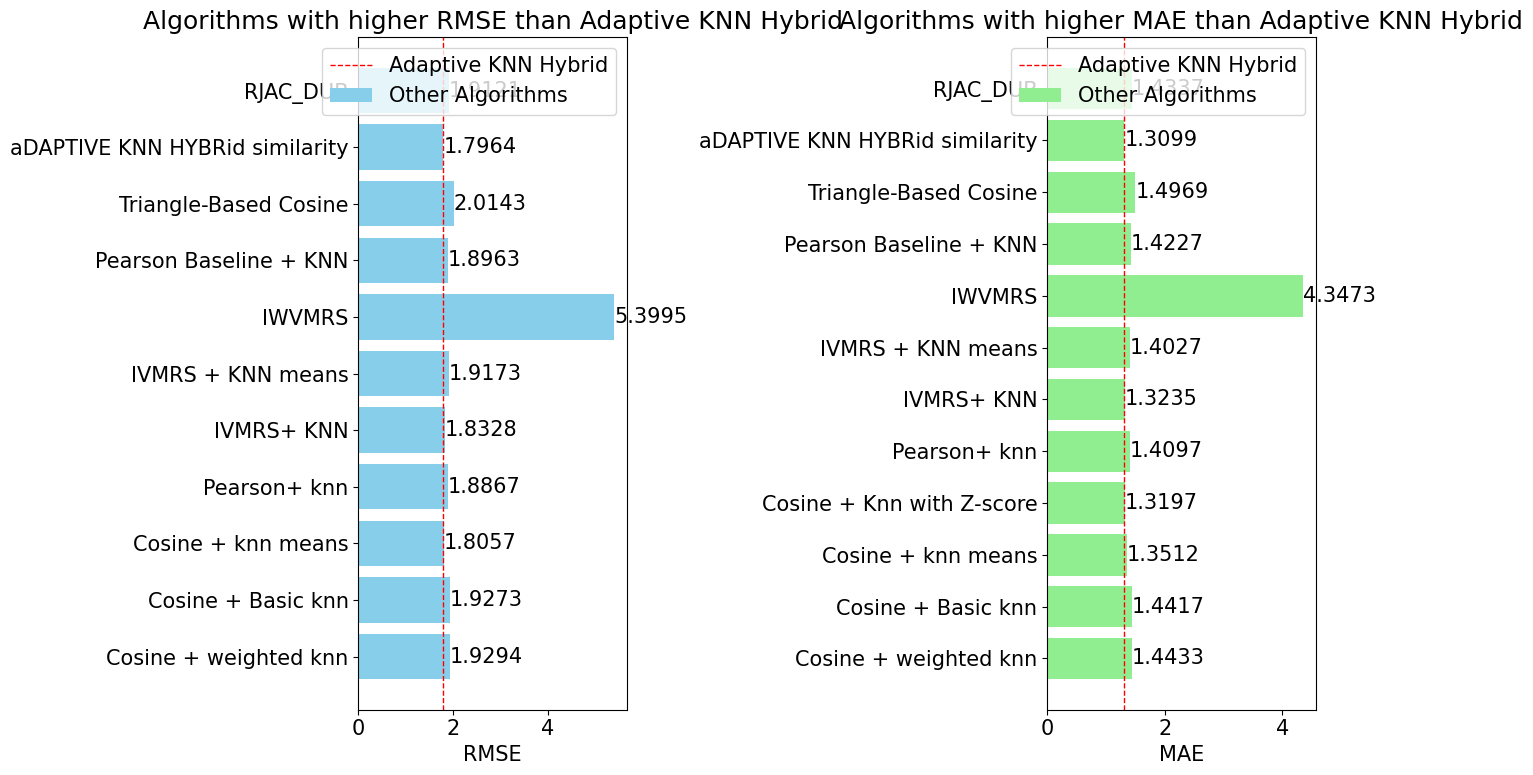

In [ ]:
import matplotlib.pyplot as plt


adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid, excluding 'Baseline' and 'IWVMRS with VMD'
excluded_algorithms = ['baseline', 'IVWMRS ']
better_rmse_algos = [name for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse and name not in excluded_algorithms]
better_mae_algos = [name for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae and name not in excluded_algorithms]

# Prepare data for plotting
better_rmse_values = [rmse for name, rmse in zip(algorithm_names, rmse_list) if rmse > adaptive_knn_rmse and name not in excluded_algorithms]
better_mae_values = [mae for name, mae in zip(algorithm_names, mae_list) if mae > adaptive_knn_mae and name not in excluded_algorithms]

# Plotting the comparison
plt.figure(figsize=(14, 8))

# RMSE Plot
plt.subplot(1, 2, 1)
bars_rmse = plt.barh(better_rmse_algos, better_rmse_values, color='skyblue', label='Other Algorithms')
plt.axvline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.xlabel('RMSE')
plt.title('Algorithms with higher RMSE than Adaptive KNN Hybrid')
plt.legend()

# Labeling bars with RMSE values
for bar, value in zip(bars_rmse, better_rmse_values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.4f}',
             va='center', ha='left', color='black')

# MAE Plot
plt.subplot(1, 2, 2)
bars_mae = plt.barh(better_mae_algos, better_mae_values, color='lightgreen', label='Other Algorithms')
plt.axvline(adaptive_knn_mae, color='red', linestyle='dashed', linewidth=1, label=adaptive_knn_name)
plt.xlabel('MAE')
plt.title('Algorithms with higher MAE than Adaptive KNN Hybrid')
plt.legend()

# Labeling bars with MAE values
for bar, value in zip(bars_mae, better_mae_values):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.4f}',
             va='center', ha='left', color='black')

plt.tight_layout()
plt.show()


**correct rjacdub**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming train_data and test_data_filtered DataFrames are already available

# Step 1: Create the User-Book matrix from the training data
user_book_matrix = train_data.pivot(index='user_id', columns='isbn', values='book_rating')

# Function to calculate mean ratings
def calculate_mean_ratings(user_book_matrix):
    return user_book_matrix.mean(axis=1)

# Function to calculate RJAC_DUB similarity between users
def calculate_rjac_dub_similarity(user_book_matrix, theta=1.0):
    mean_ratings = calculate_mean_ratings(user_book_matrix)
    n_users = user_book_matrix.shape[0]
    similarity_matrix = np.zeros((n_users, n_users))
    for i in range(n_users):
        for j in range(n_users):
            if i != j:
                common_items = (user_book_matrix.iloc[i].notna()) & (user_book_matrix.iloc[j].notna())
                if np.any(common_items):
                    ratings_i = user_book_matrix.iloc[i][common_items] - mean_ratings.iloc[i]
                    ratings_j = user_book_matrix.iloc[j][common_items] - mean_ratings.iloc[j]
                    differences = np.abs(ratings_i - ratings_j)
                    ntdub = np.sum(differences <= theta)
                    union_count = len(user_book_matrix.iloc[i].dropna()) + len(user_book_matrix.iloc[j].dropna()) - np.sum(common_items)
                    similarity_matrix[i, j] = ntdub / union_count
    return pd.DataFrame(similarity_matrix, index=user_book_matrix.index, columns=user_book_matrix.index)

# Step 2: Calculate the RJAC_DUB similarity matrix
user_similarity_matrix_rjac_dub = calculate_rjac_dub_similarity(user_book_matrix)

# Function to find the top k neighbors for a given user
def find_top_k_neighbors(user_id, similarity_matrix, k=40):
    if user_id in similarity_matrix.index:
        user_similarities = similarity_matrix.loc[user_id]
        top_k_neighbors = user_similarities.nlargest(k + 1).index  # +1 to exclude the user itself
        top_k_neighbors = top_k_neighbors[top_k_neighbors != user_id]  # Remove the user itself if present
        return top_k_neighbors[:k]
    else:
        return []

# Function to predict rating for a given user and book using RJAC_DUB similarity
def predict_rating_knn_rjac_dub(user_id, book_id, user_book_matrix, similarity_matrix, k=40):
    neighbors = find_top_k_neighbors(user_id, similarity_matrix, k)
    numerator = 0
    denominator = 0
    for neighbor in neighbors:
        if book_id in user_book_matrix.columns:
            rating_by_neighbor = user_book_matrix.loc[neighbor, book_id]
            if not np.isnan(rating_by_neighbor):
                numerator += rating_by_neighbor * similarity_matrix.loc[user_id, neighbor]
                denominator += similarity_matrix.loc[user_id, neighbor]

    if denominator == 0:
        return user_book_matrix.loc[user_id].mean()

    prediction = numerator / denominator
    return prediction

# Loop through the entire test set and make predictions
results = []

for index, row in test_data_filtered.iterrows():
    user_id = row['user_id']
    book_id = row['isbn']
    actual_rating = row['book_rating']

    # Predict rating using RJAC_DUB similarity
    predicted_rating = predict_rating_knn_rjac_dub(user_id, book_id, user_book_matrix, user_similarity_matrix_rjac_dub)

    results.append((user_id, book_id, actual_rating, predicted_rating))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['user_id', 'isbn', 'actual_rating', 'predicted_rating'])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(results_df['actual_rating'], results_df['predicted_rating']))
mae = mean_absolute_error(results_df['actual_rating'], results_df['predicted_rating'])

# Display the results DataFrame
print("Prediction Results for All Test Users (KNN with RJAC_DUB Similarity):")
print(results_df)

# Print RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
# Append results to the lists
algorithm_names.append('RJAC_DUB')
rmse_list.append(rmse)
mae_list.append(mae)



Prediction Results for All Test Users (KNN with RJAC_DUB Similarity):
      user_id        isbn  actual_rating  predicted_rating
0       14422  0679745203              5          6.000000
1       50225  0679731148              7          7.000000
2       86189  067976402X              5          6.777778
3      269566  002542730X              7          7.461538
4      114085  0842332251             10          9.600567
...       ...         ...            ...               ...
5094   241980  0312306326             10          6.570093
5095   234828  042513525X              8          9.184211
5096     1424  0767902521              8          8.000000
5097    95359  0385472951              4          7.536272
5098    37293  034541389X              8          7.000000

[5099 rows x 4 columns]
RMSE: 1.9120592781966304
MAE: 1.4336616631963475


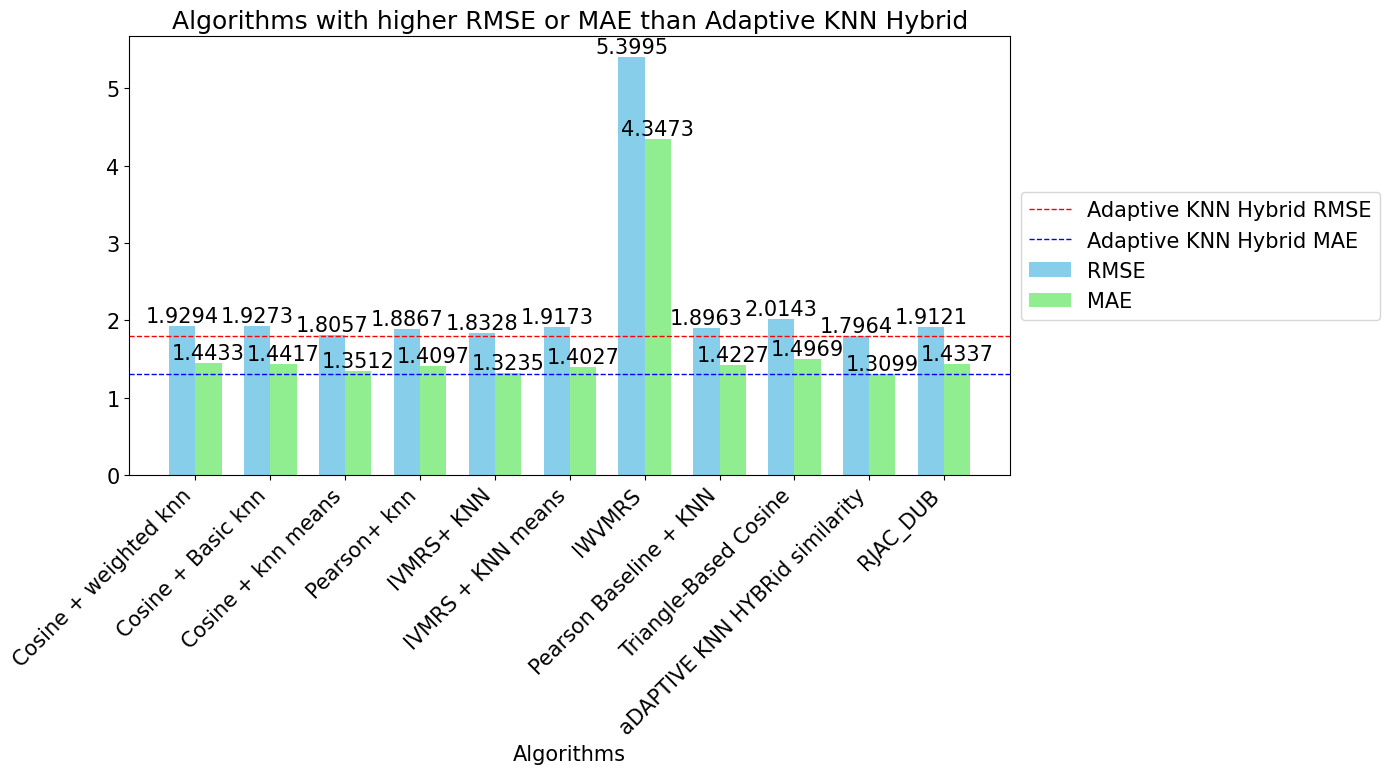

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original data


adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid, excluding 'Baseline' and 'IWVMRS with VMD'
excluded_algorithms = ['baseline', 'IVWMRS ']
excluded_algorithms = ['Cosine + Knn with Z-score']
better_algos = [name for name in algorithm_names if name not in excluded_algorithms and (
                rmse_list[algorithm_names.index(name)] > adaptive_knn_rmse or
                mae_list[algorithm_names.index(name)] > adaptive_knn_mae)]

# Prepare data for plotting
better_rmse_values = [rmse_list[algorithm_names.index(name)] for name in better_algos]
better_mae_values = [mae_list[algorithm_names.index(name)] for name in better_algos]

# Create a grouped bar plot
x = np.arange(len(better_algos))
width = 0.35

plt.figure(figsize=(14, 8))

bars1 = plt.bar(x - width/2, better_rmse_values, width, label='RMSE', color='skyblue')
bars2 = plt.bar(x + width/2, better_mae_values, width, label='MAE', color='lightgreen')

plt.axhline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} RMSE')
plt.axhline(adaptive_knn_mae, color='blue', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} MAE')

plt.xlabel('Algorithms')
plt.title('Algorithms with higher RMSE or MAE than Adaptive KNN Hybrid')
plt.xticks(x, better_algos, rotation=45, ha='right')

# Move legend to the top of the plot
#plt.legend(loc='upper left', bbox_to_anchor=(0.3, 1.0), ncol=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Labeling bars with RMSE and MAE values
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

plt.tight_layout()
plt.show()

**SMD**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original data


adaptive_knn_name = "Adaptive KNN Hybrid"
adaptive_knn_rmse = 1.7964
adaptive_knn_mae = 1.3099

# Find algorithms with higher RMSE and MAE than Adaptive KNN Hybrid, excluding 'Baseline' and 'IWVMRS with VMD'
excluded_algorithms = ['baseline', 'IVWMRS ']
better_algos = [name for name in algorithm_names if name not in excluded_algorithms and (
                rmse_list[algorithm_names.index(name)] > adaptive_knn_rmse or
                mae_list[algorithm_names.index(name)] > adaptive_knn_mae)]

# Prepare data for plotting
better_rmse_values = [rmse_list[algorithm_names.index(name)] for name in better_algos]
better_mae_values = [mae_list[algorithm_names.index(name)] for name in better_algos]

# Create a grouped bar plot
x = np.arange(len(better_algos))
width = 0.35

plt.figure(figsize=(14, 8))

bars1 = plt.bar(x - width/2, better_rmse_values, width, label='RMSE', color='skyblue')
bars2 = plt.bar(x + width/2, better_mae_values, width, label='MAE', color='lightgreen')

plt.axhline(adaptive_knn_rmse, color='red', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} RMSE')
plt.axhline(adaptive_knn_mae, color='blue', linestyle='dashed', linewidth=1, label=f'{adaptive_knn_name} MAE')

plt.xlabel('Algorithms')
plt.title('Algorithms with higher RMSE or MAE than Adaptive KNN Hybrid')
plt.xticks(x, better_algos, rotation=45, ha='right')

# Move legend to the top of the plot
#plt.legend(loc='upper left', bbox_to_anchor=(0.3, 1.0), ncol=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Labeling bars with RMSE and MAE values
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center', color='black')

plt.tight_layout()
plt.show()

**

In [ ]:
import matplotlib.pyplot as plt

# Assuming algorithm_names, rmse_list, and mae_list are defined


# Create duplicates of the original lists
filtered_algorithm_names = algorithm_names.copy()
filtered_rmse_list = rmse_list.copy()
filtered_mae_list = mae_list.copy()

# Remove 'baseline', 'iwvmrs', 'ivwmrs', and 'SVD' from the lists
indexes_to_remove = [i for i, name in enumerate(filtered_algorithm_names) if name.lower() in ['baseline', 'IWVMRS ', 'SVD']]
for index in sorted(indexes_to_remove, reverse=True):
    del filtered_algorithm_names[index]
    del filtered_rmse_list[index]
    del filtered_mae_list[index]

# Sort the filtered lists by RMSE
sorted_rmse_indexes = sorted(range(len(filtered_rmse_list)), key=lambda k: filtered_rmse_list[k])
sorted_algorithm_names_rmse = [filtered_algorithm_names[i] for i in sorted_rmse_indexes]
sorted_rmse_list = [filtered_rmse_list[i] for i in sorted_rmse_indexes]

# Sort the filtered lists by MAE
sorted_mae_indexes = sorted(range(len(filtered_mae_list)), key=lambda k: filtered_mae_list[k])
sorted_algorithm_names_mae = [filtered_algorithm_names[i] for i in sorted_mae_indexes]
sorted_mae_list = [filtered_mae_list[i] for i in sorted_mae_indexes]

# Plot bar graphs for RMSE and MAE
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Bar graph for RMSE
ax[0].bar(sorted_algorithm_names_rmse, sorted_rmse_list, color='b')
ax[0].set_title('RMSE of Different Algorithms')
ax[0].set_ylabel('RMSE')
ax[0].set_ylim(0, 2)  # Adjust y-axis limits for better visibility
ax[0].set_xticklabels(sorted_algorithm_names_rmse, rotation=45, ha='right')

# Bar graph for MAE
ax[1].bar(sorted_algorithm_names_mae, sorted_mae_list, color='r')
ax[1].set_title('MAE of Different Algorithms')
ax[1].set_ylabel('MAE')
ax[1].set_ylim(0, 1.5)  # Adjust y-axis limits for better visibility
ax[1].set_xticklabels(sorted_algorithm_names_mae, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Find the algorithm with the minimum RMSE and MAE
min_rmse_index = filtered_rmse_list.index(min(filtered_rmse_list))
min_mae_index = filtered_mae_list.index(min(filtered_mae_list))

min_rmse_algorithm = filtered_algorithm_names[min_rmse_index]
min_mae_algorithm = filtered_algorithm_names[min_mae_index]

# Create a table for the minimum RMSE and MAE valued algorithms
import pandas as pd

data = {
    'Metric': ['RMSE', 'MAE'],
    'Algorithm': [min_rmse_algorithm, min_mae_algorithm],
    'Value': [filtered_rmse_list[min_rmse_index], filtered_mae_list[min_mae_index]]
}

df = pd.DataFrame(data)
print(df)
